In [1]:
import torch

features = torch.load('batched_data\\features')
labels = torch.load('batched_data\\labels')

In [2]:
print(features[0].shape)
print(labels[0].shape)

torch.Size([17280, 2])
torch.Size([17280])


In [3]:
import matplotlib.pyplot as plt

def graph_enmo_from_torch(x, y):
    if y[0] == 0:
        event_at_change = 1
    else:
        event_at_change = 0
    try:
        event_index = (y == event_at_change).nonzero(as_tuple=True)[0][0]
        len_30 = (30 * 60) // 5 

        if event_index - len_30 < 0:
            print("event too close to start of series")
            return


        fig, ax1 = plt.subplots()
        fig.set_size_inches(15, 5)

        ax1.set_xlabel('step')
        ax1.set_ylabel('enmo')
        ax1.set_title('anglez and enmo vs step 30 minutes before and after event' )

        domain = range(event_index - len_30, event_index + len_30)

        ax1.plot(domain, x[event_index - len_30: event_index + len_30], color='g', label="enmo")
        ax1.legend()

        ax1.tick_params(axis='y')
        ax2 = ax1.twinx()

        ax2.axvline(x=event_index, color='r', linestyle='--', label="event")
        ax2.legend()

    except:
        print("no event in this series")
        return

In [4]:
def check_if_event_in_series(label):
    start = label[0]
    event_value = (start + 1) % 2
    event_index = (label == event_value).nonzero(as_tuple=True)[0]
    if len(event_index) == 0:
        return 0
    else:
        return 1
    

C:\Users\yotam\AppData\Local\Temp\ipykernel_3156\3471831060.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots()


no event in this series

62.0 % of series have an event


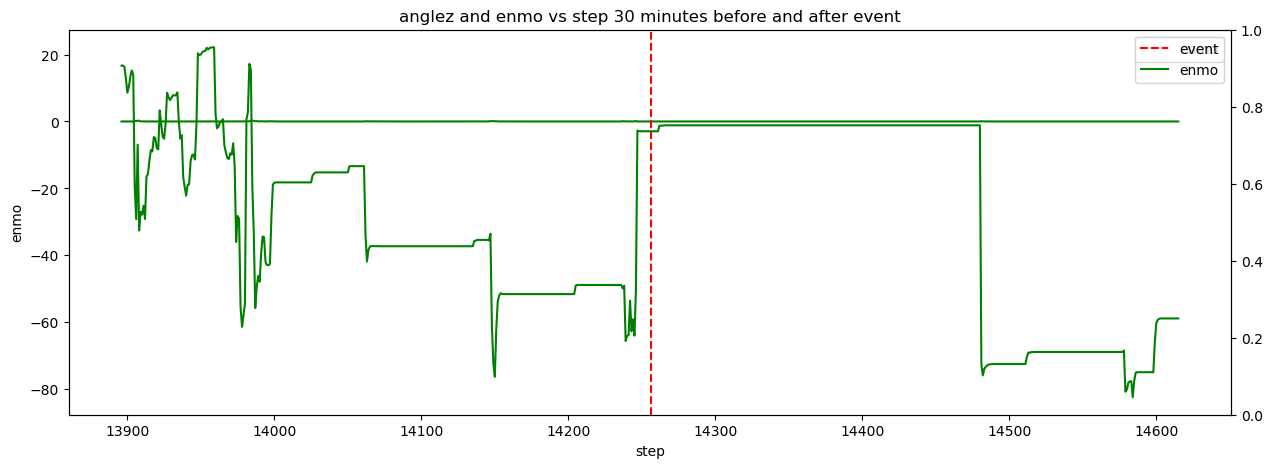

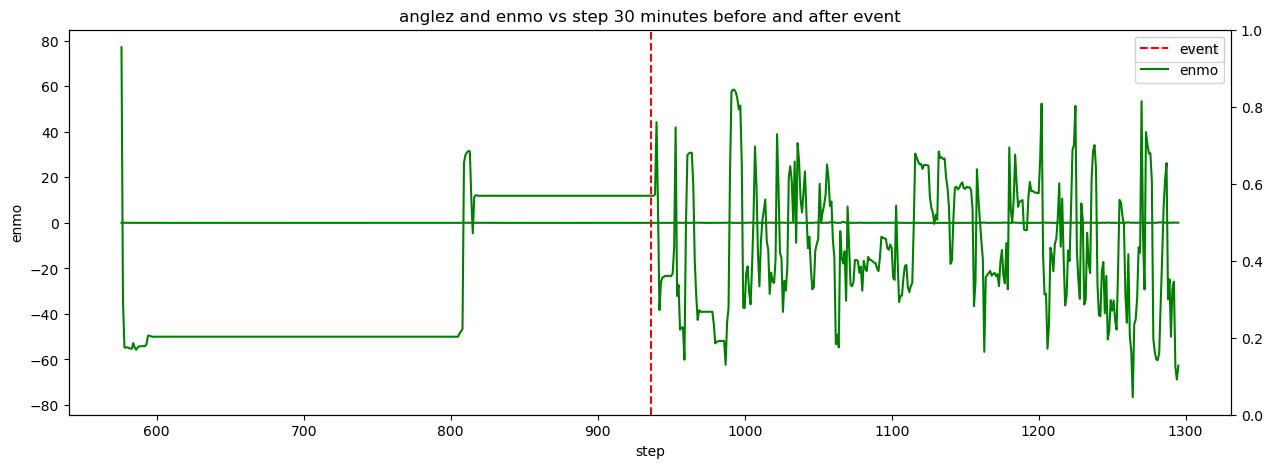

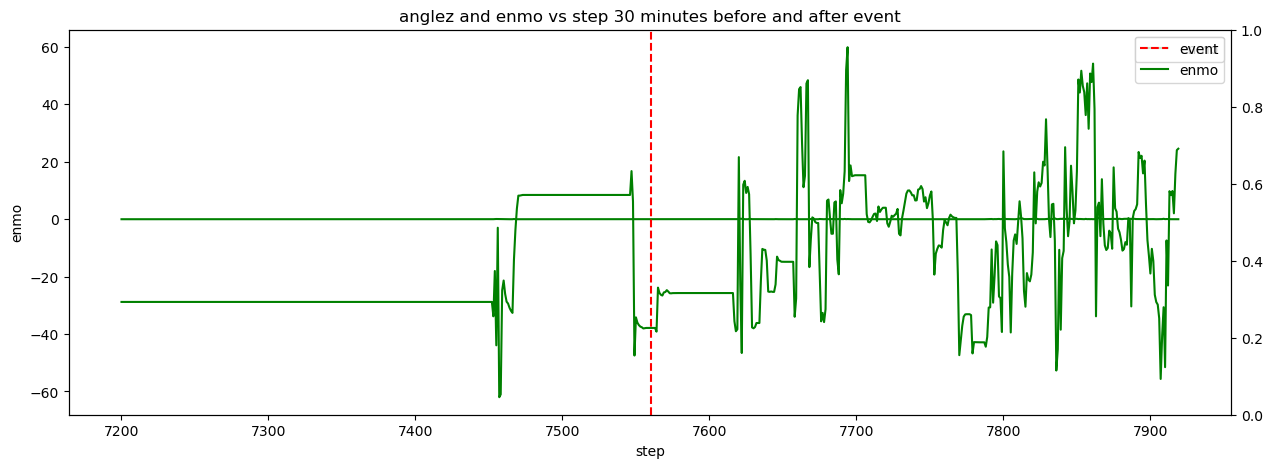

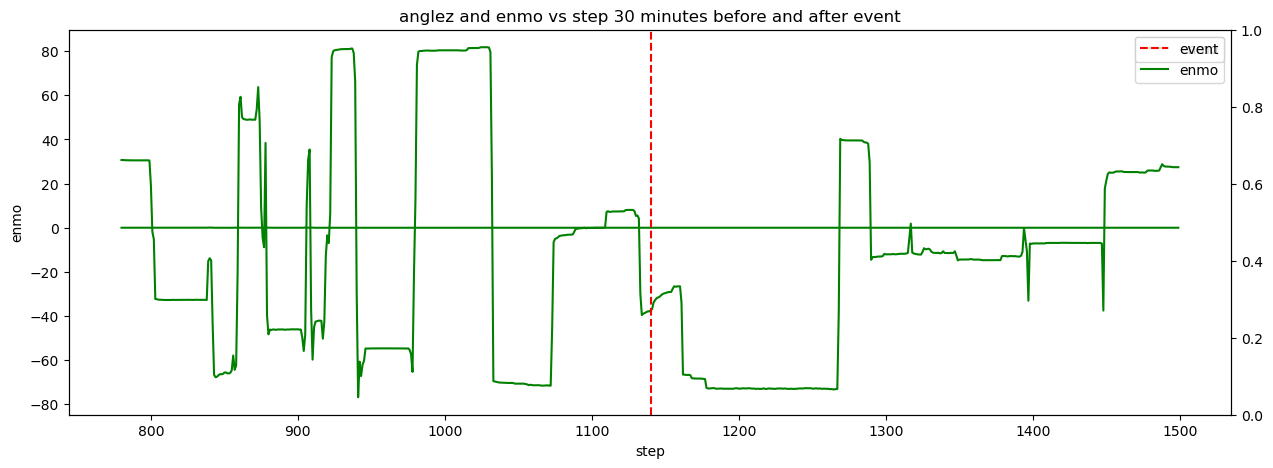

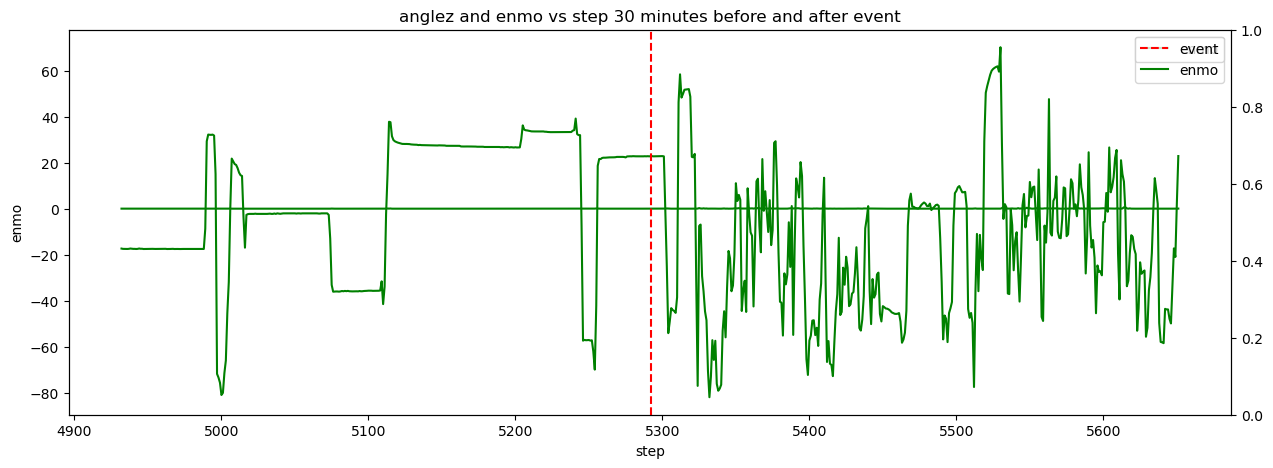

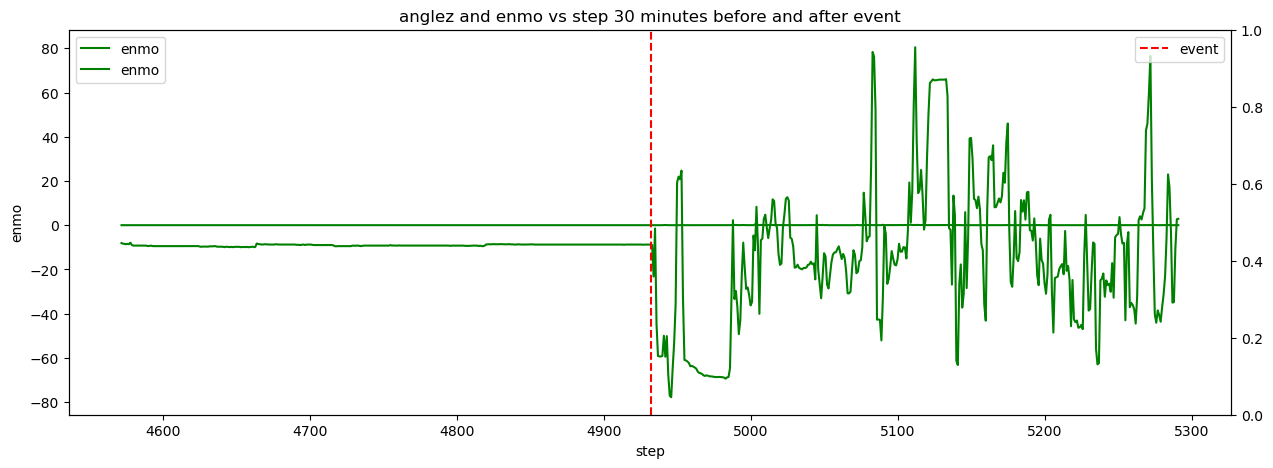

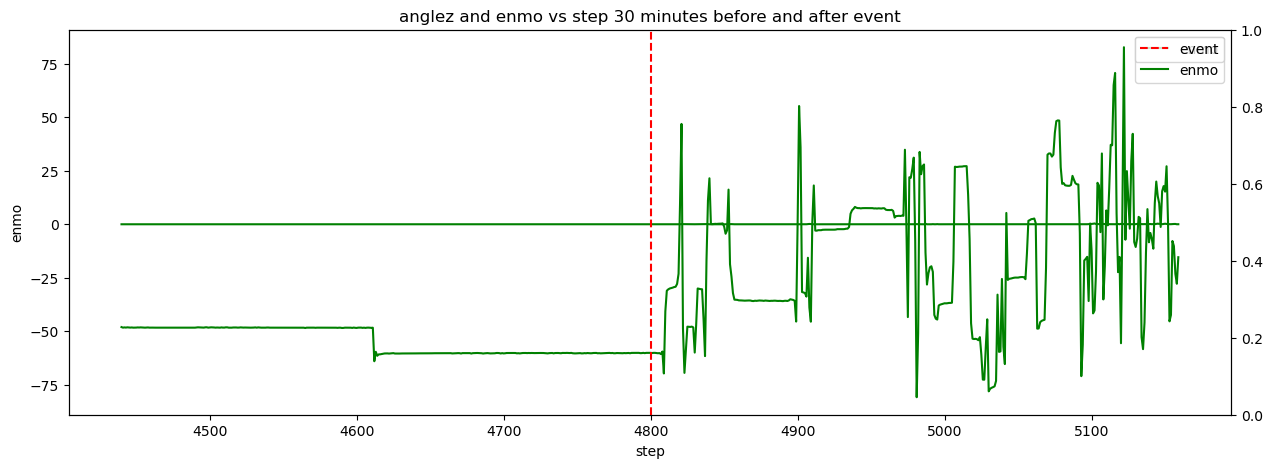

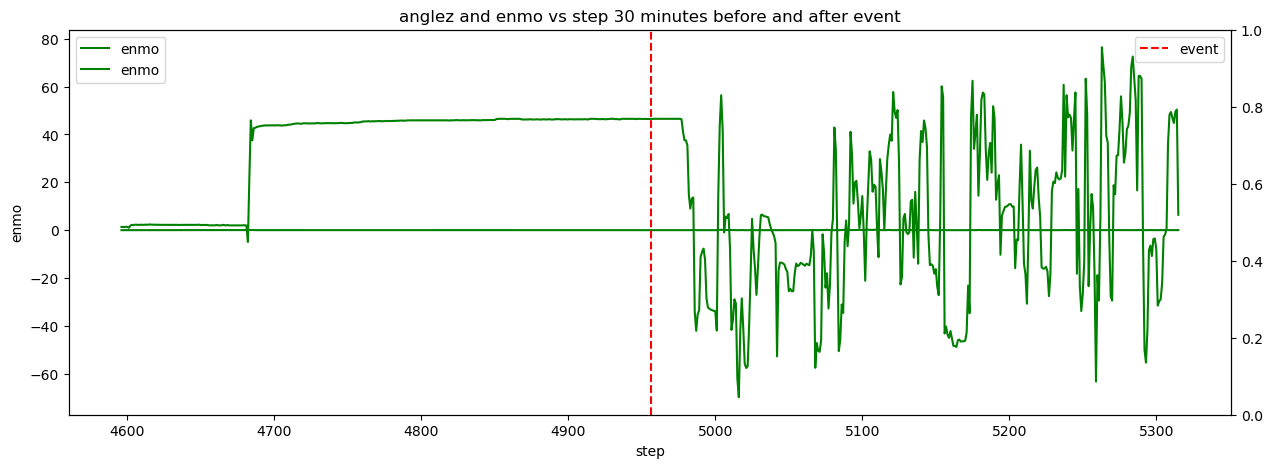

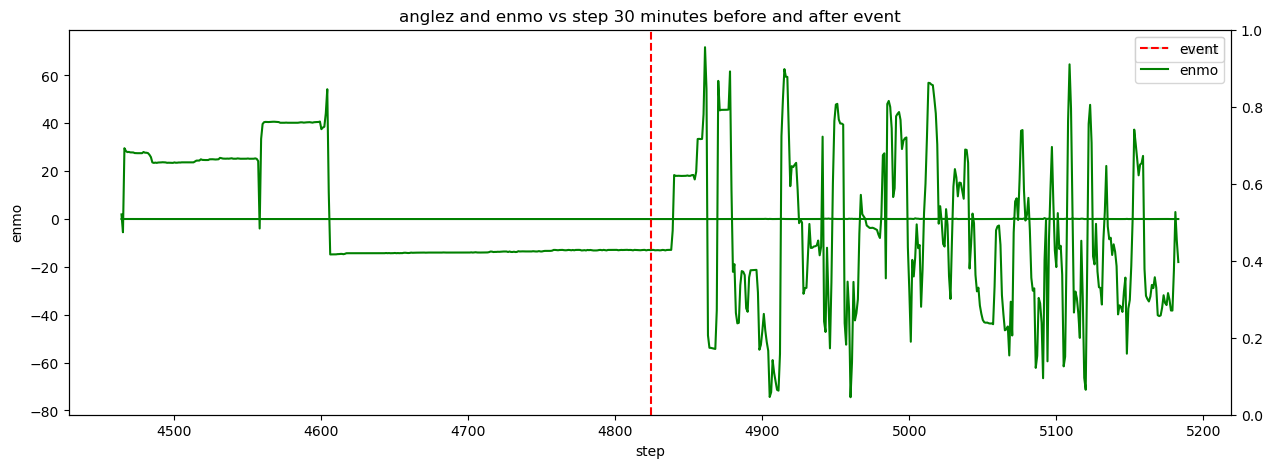

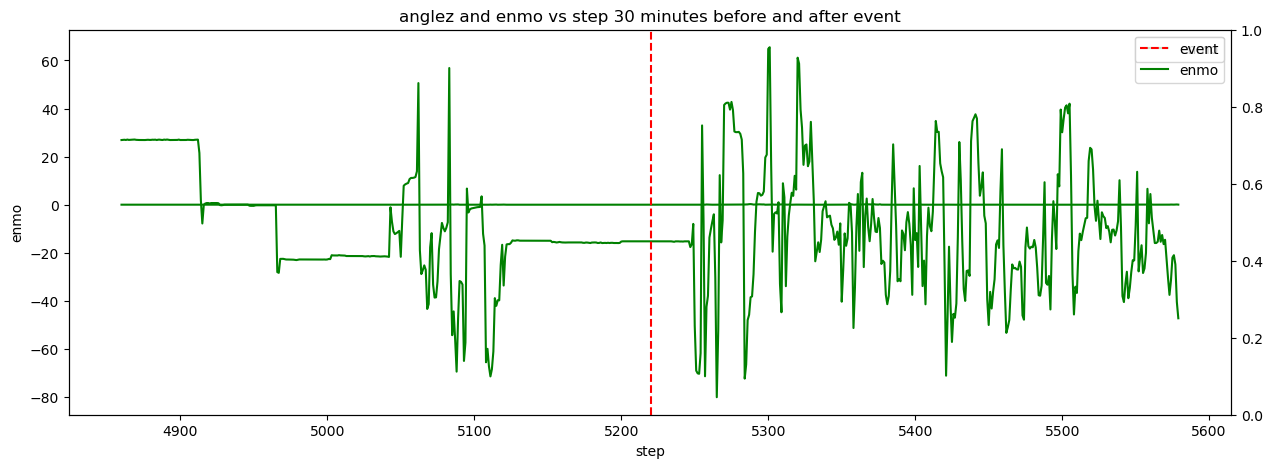

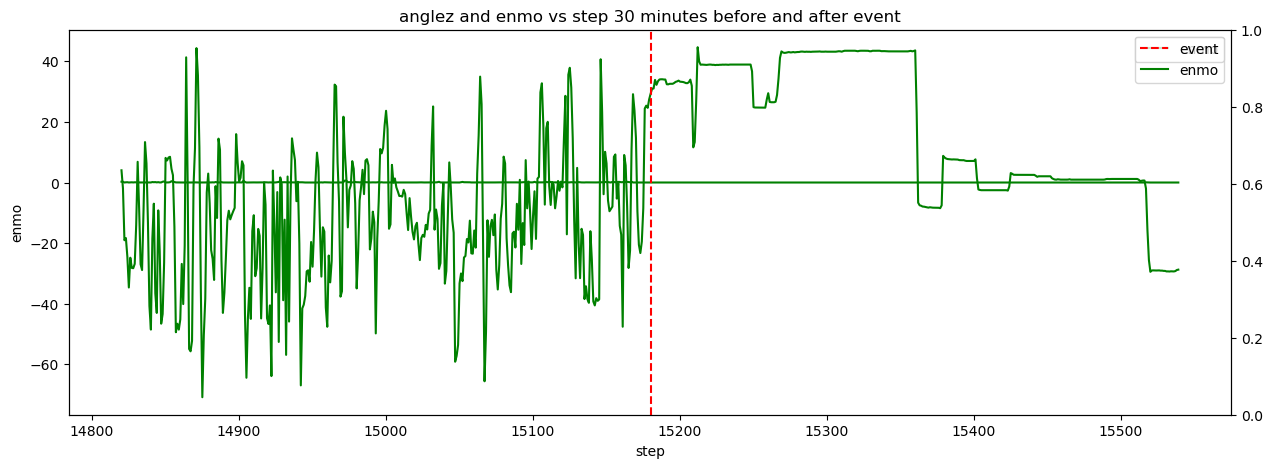

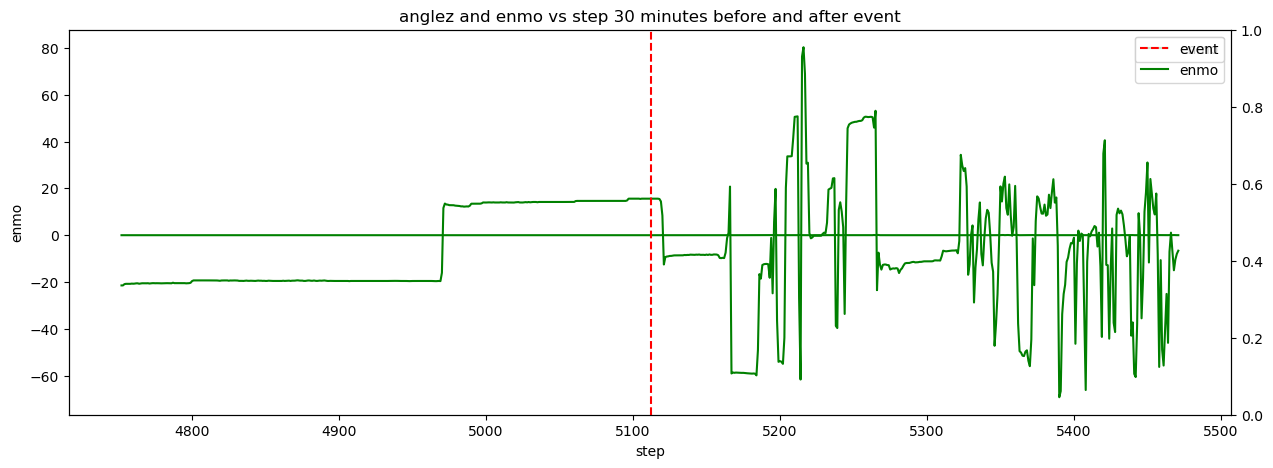

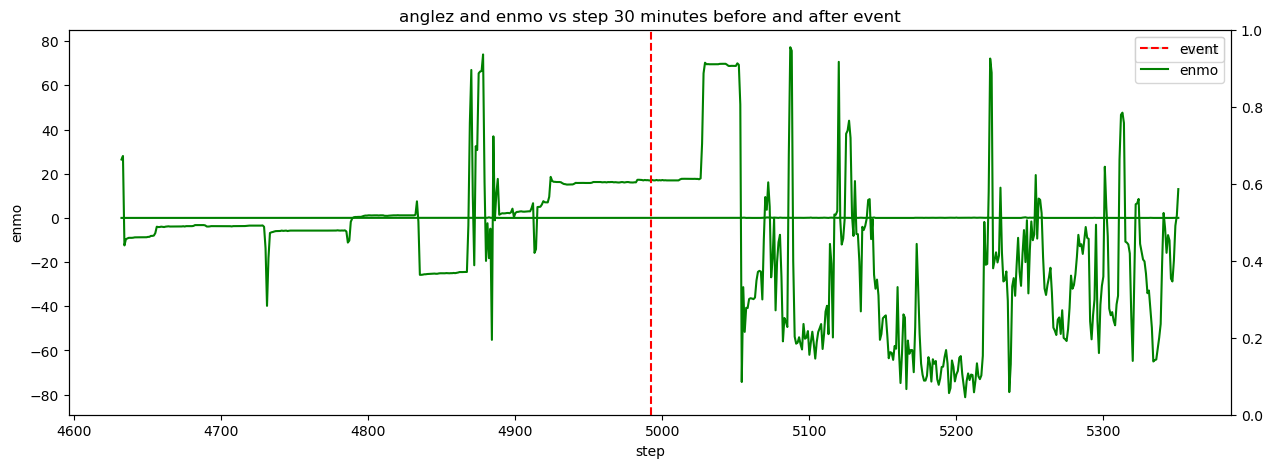

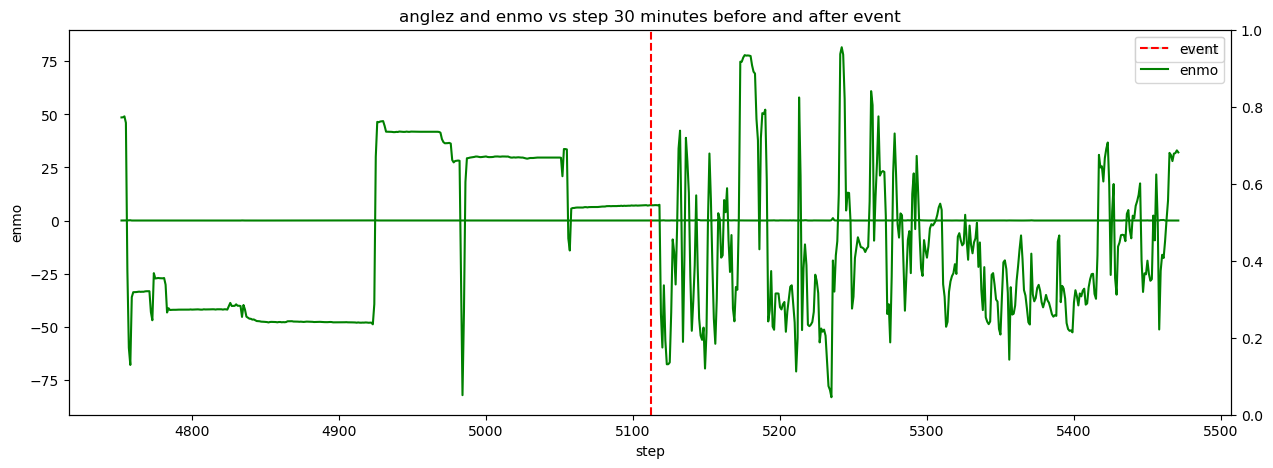

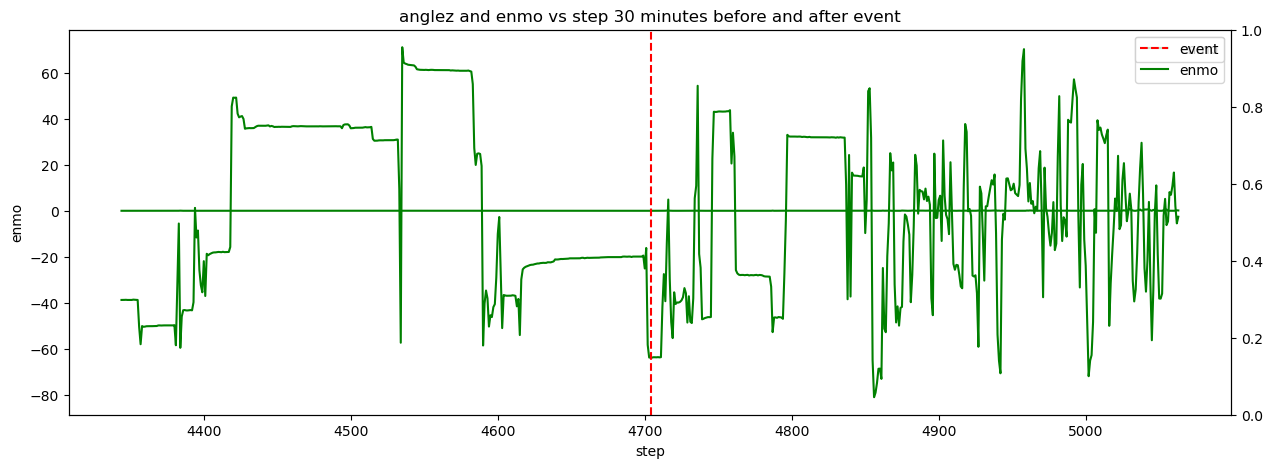

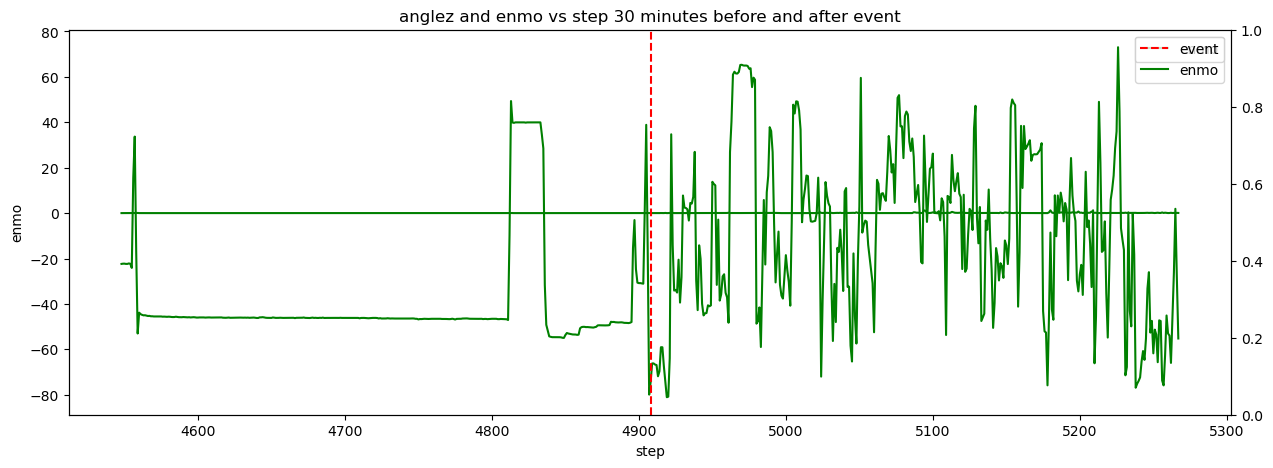

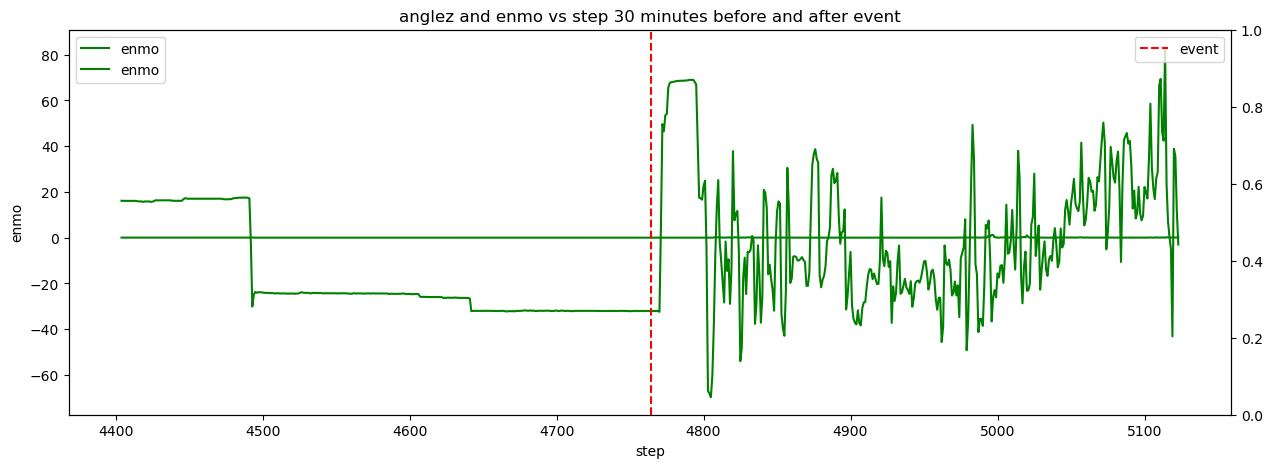

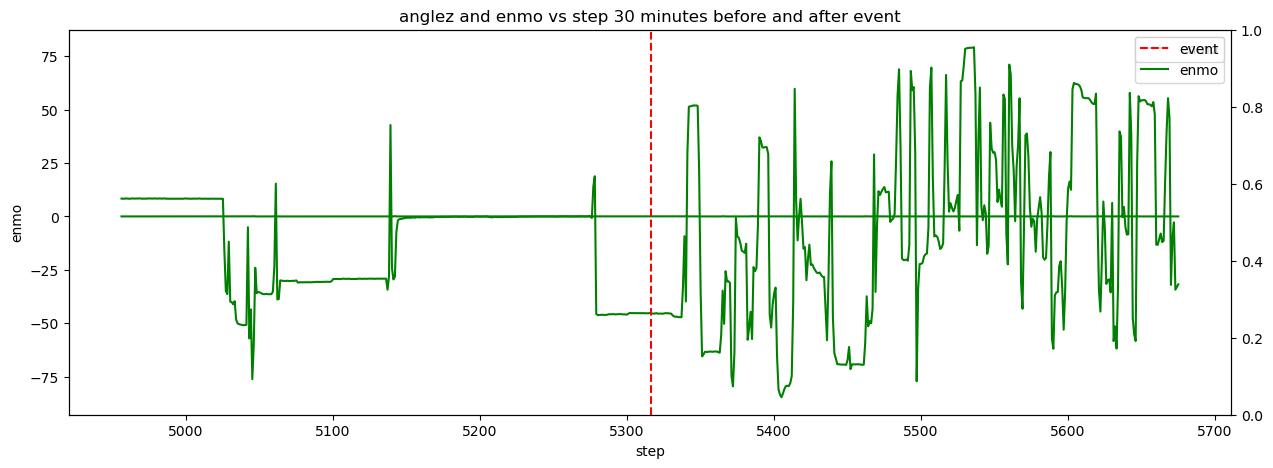

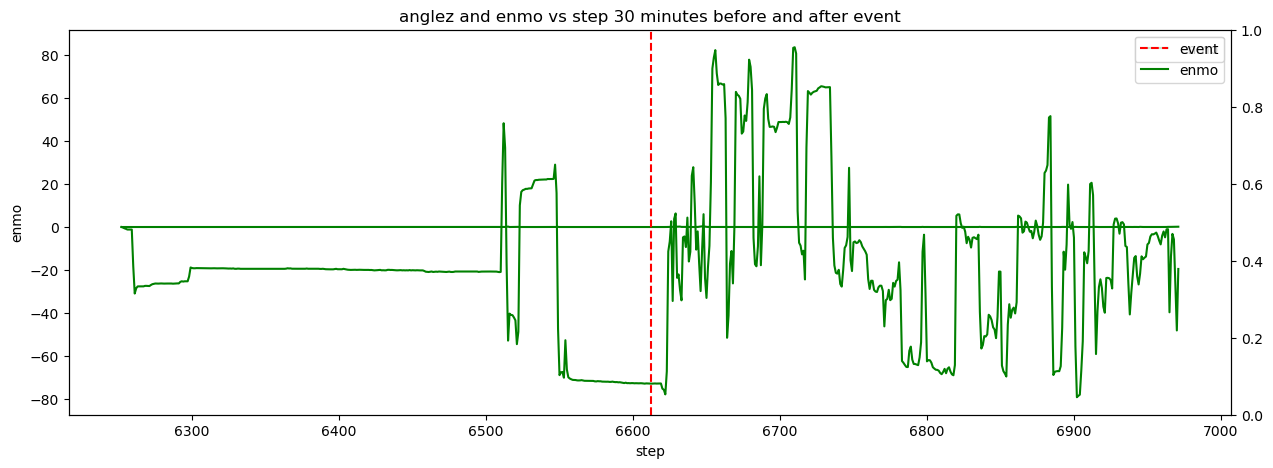

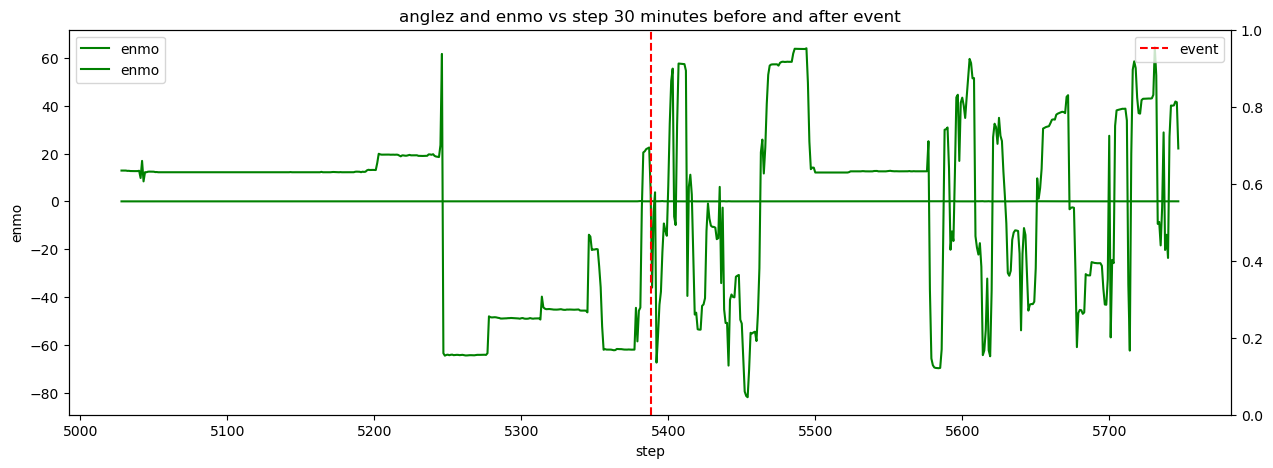

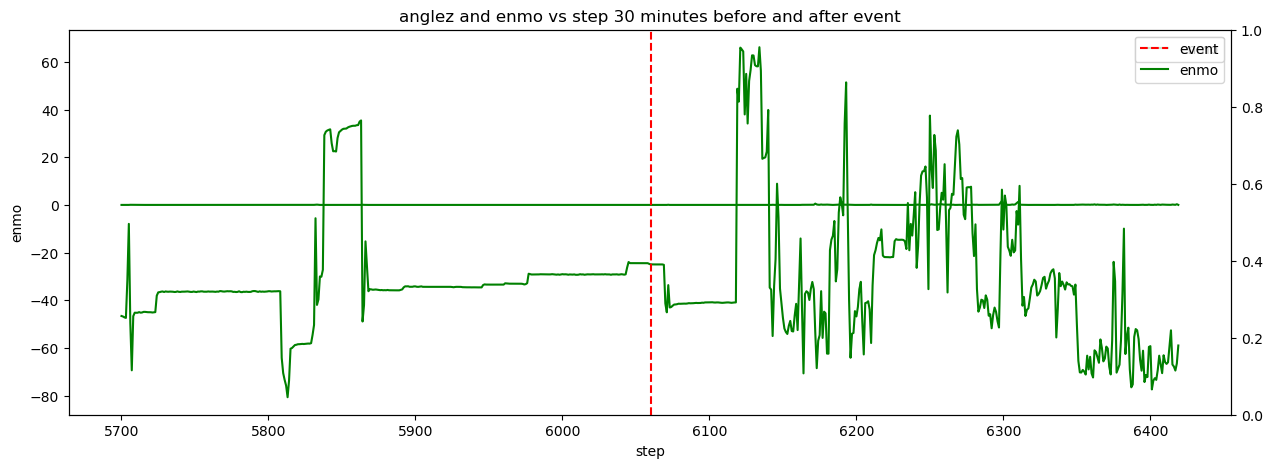

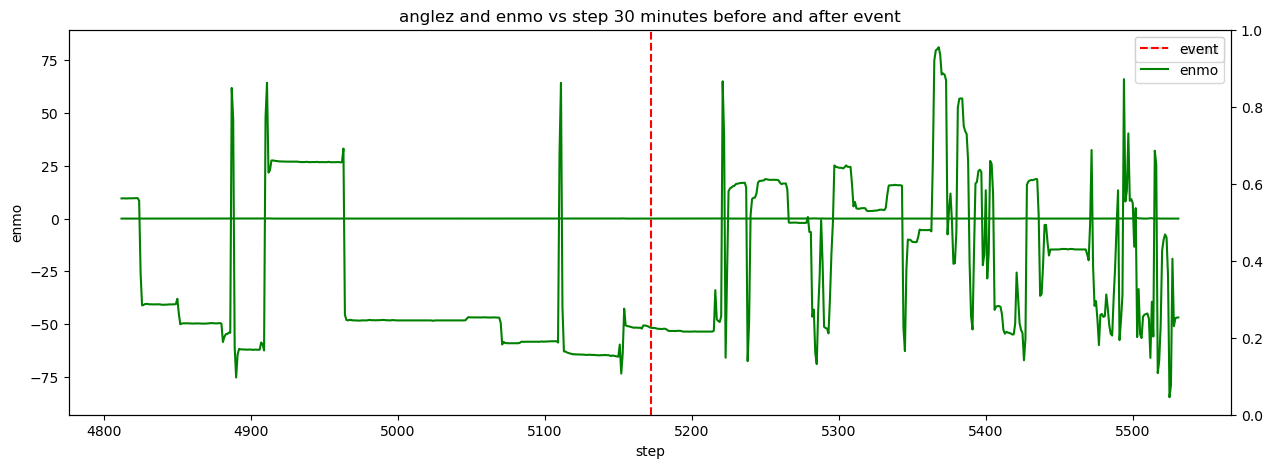

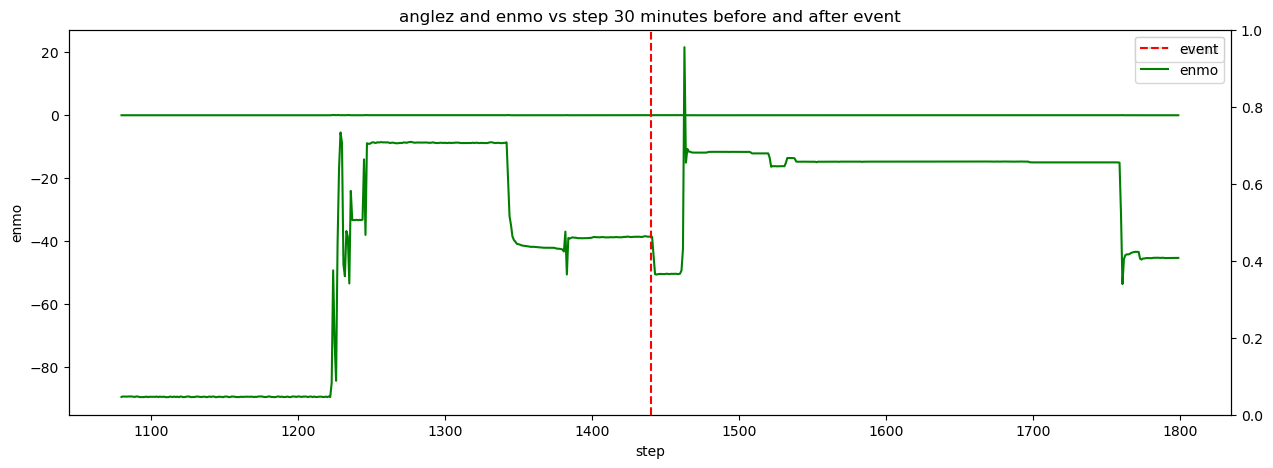

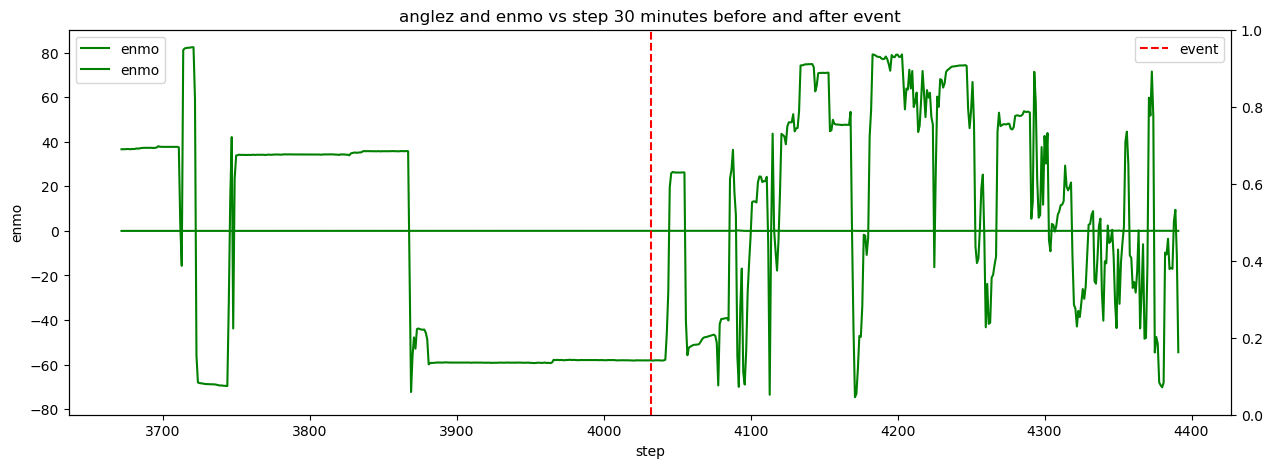

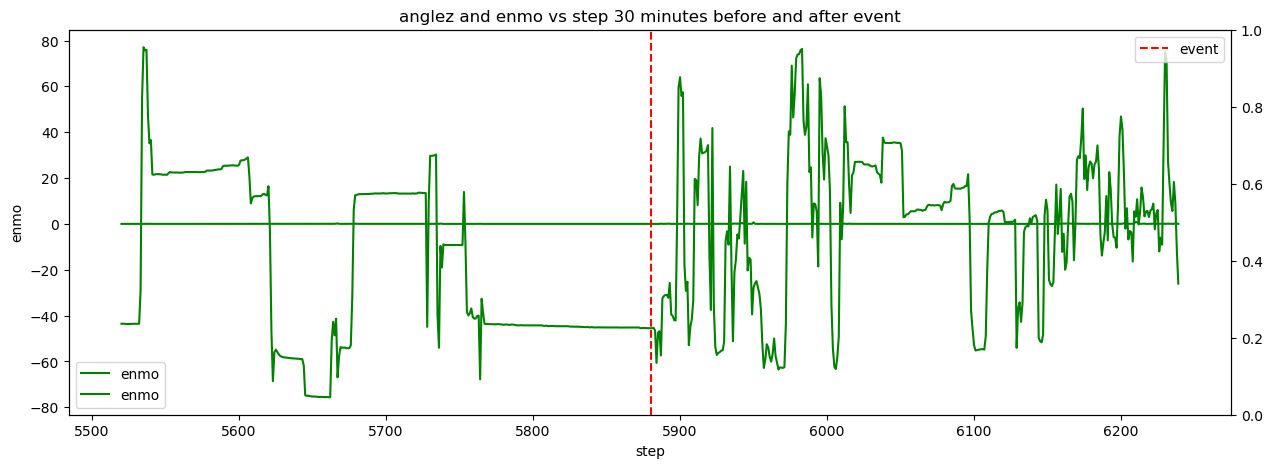

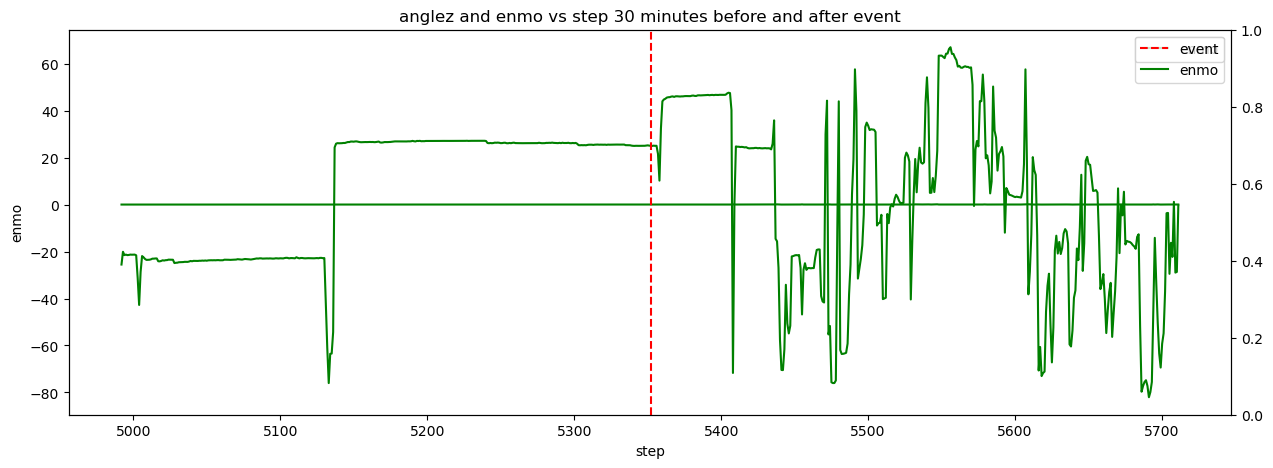

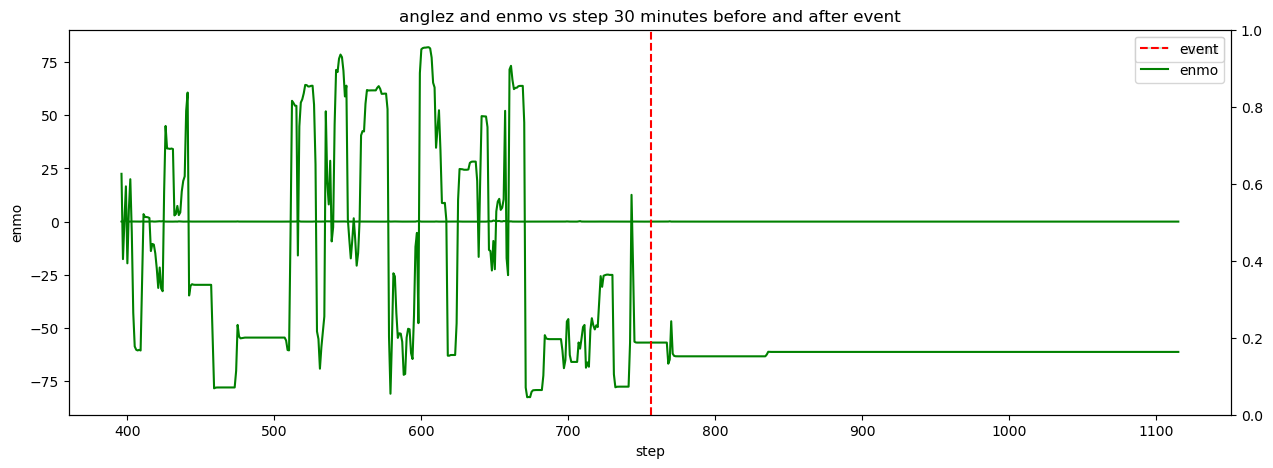

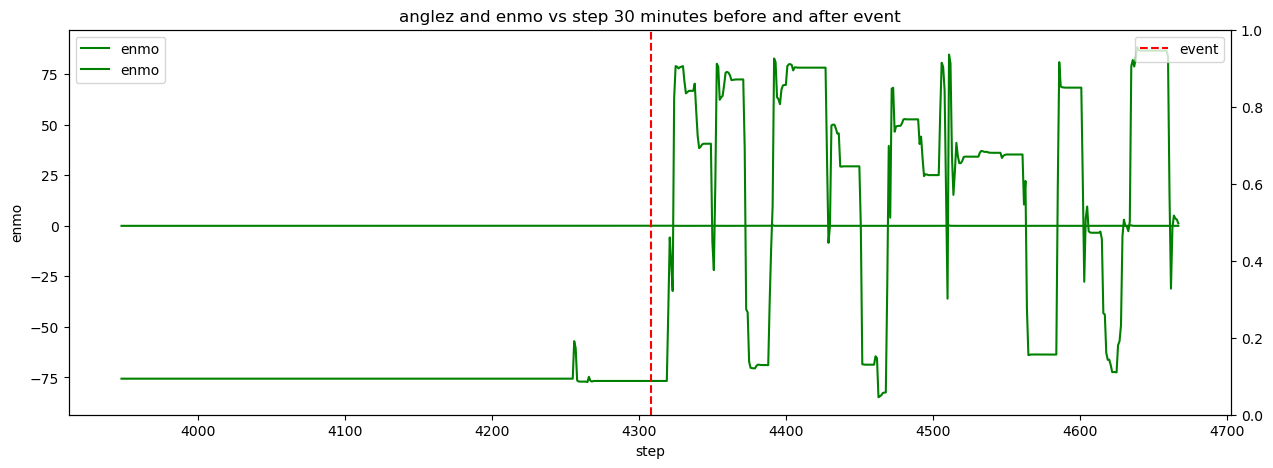

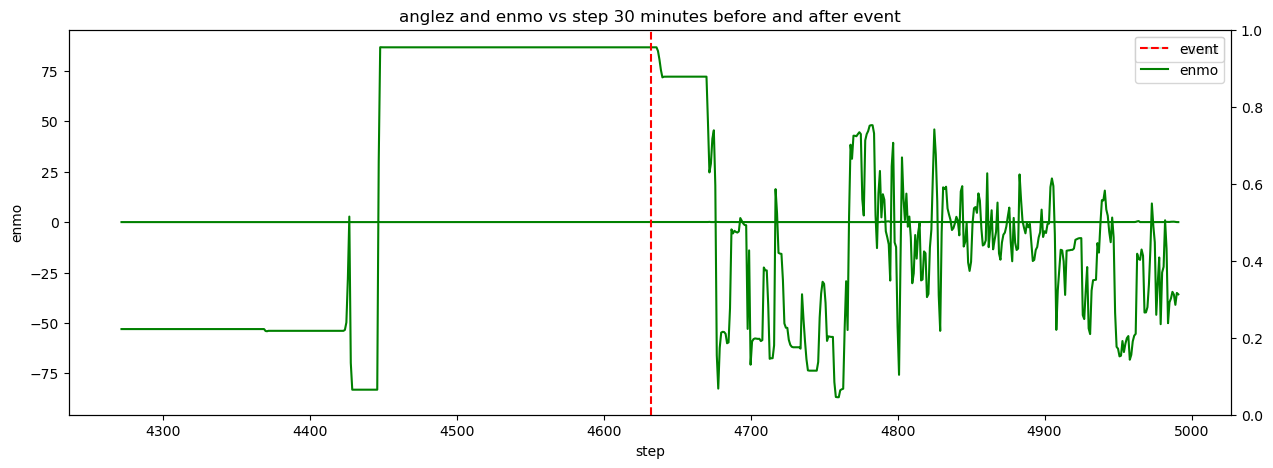

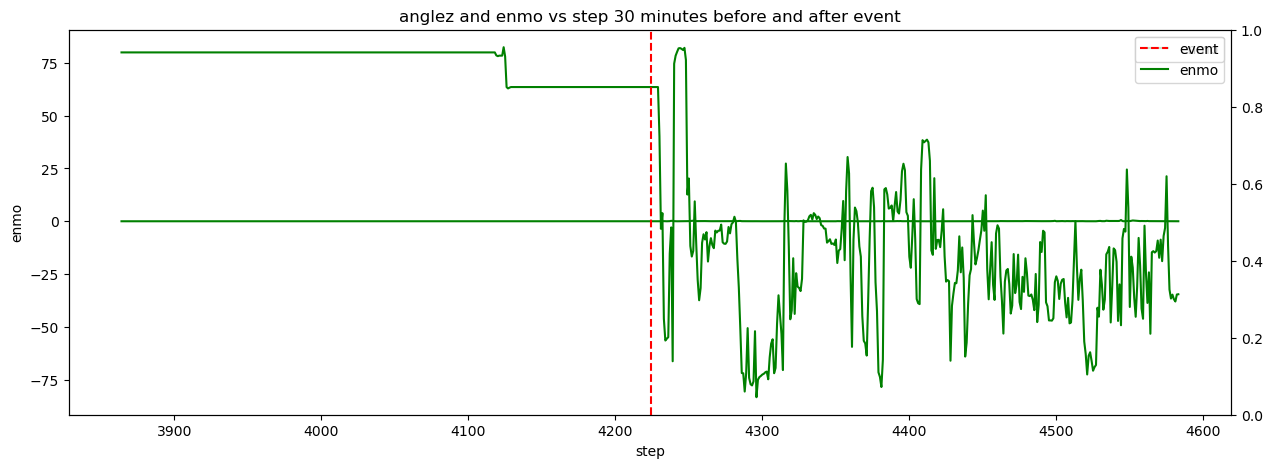

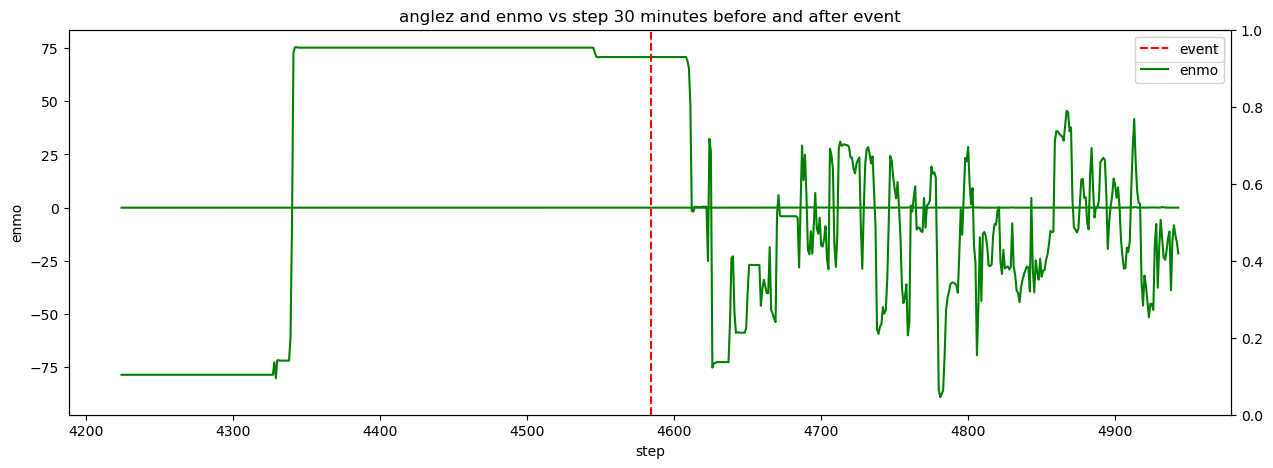

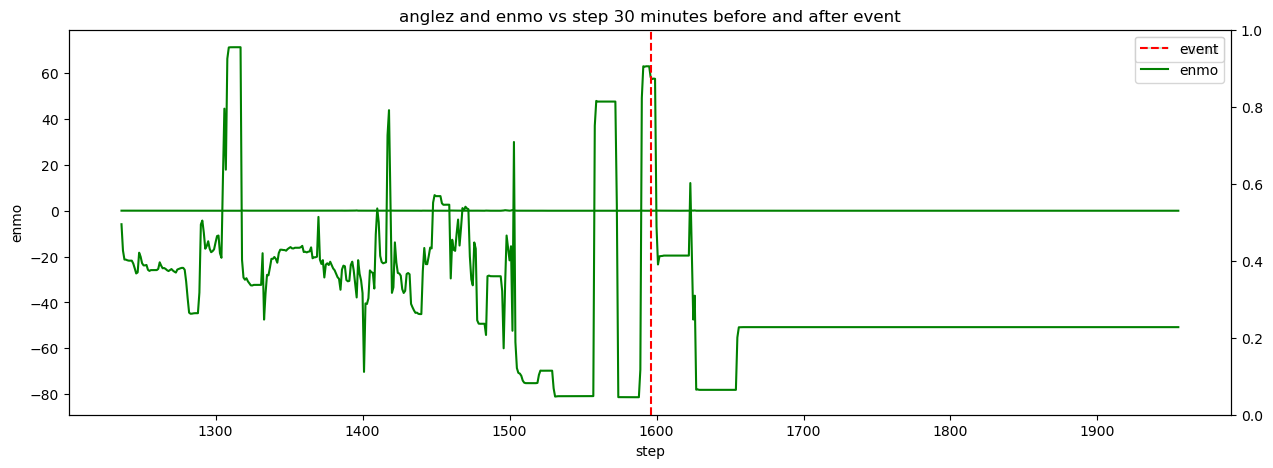

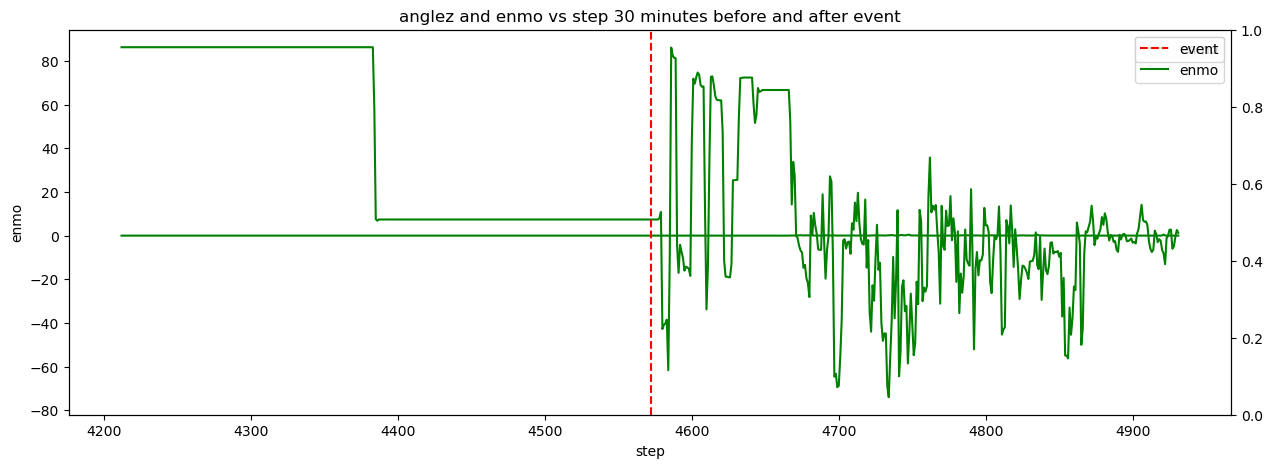

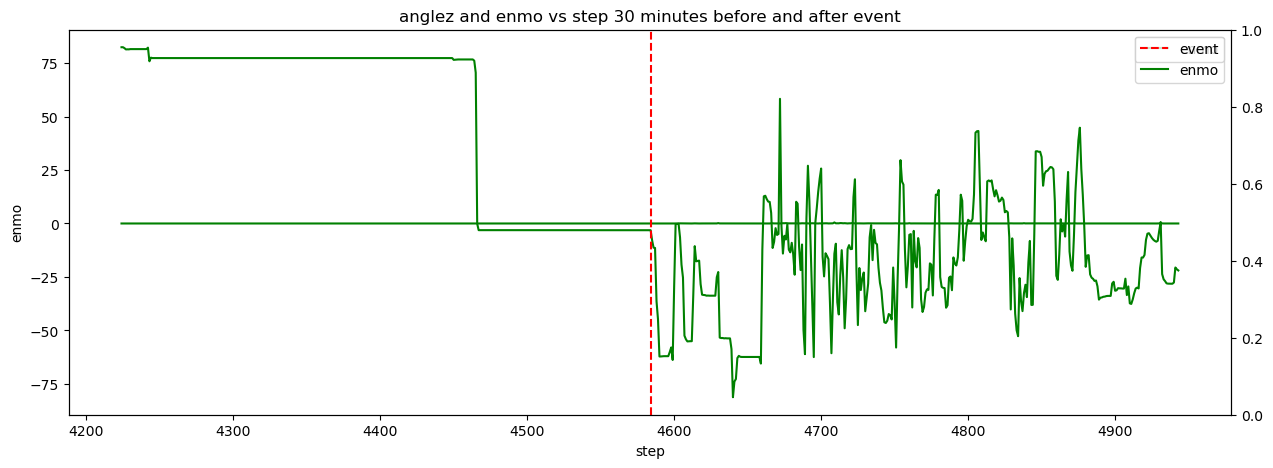

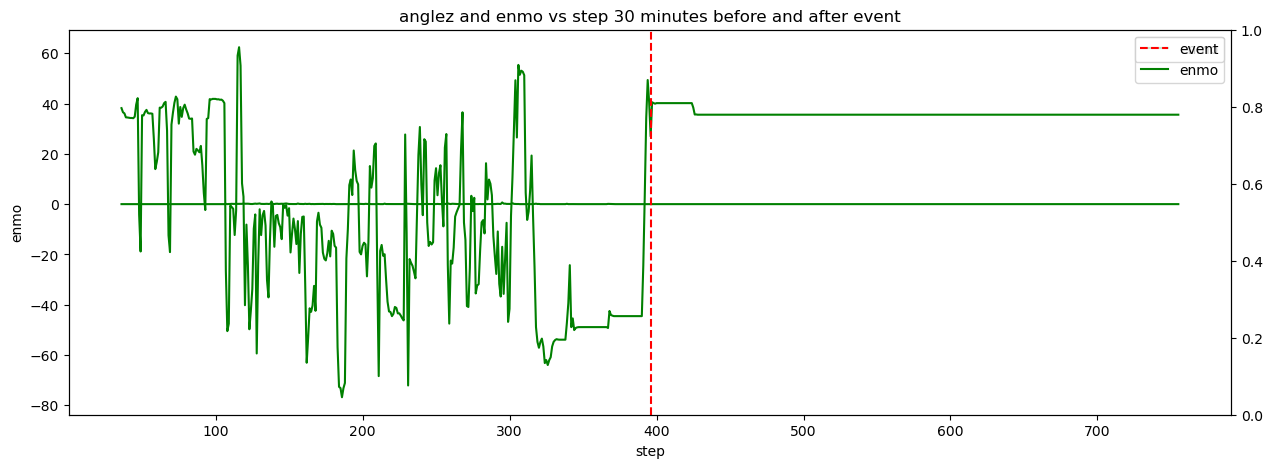

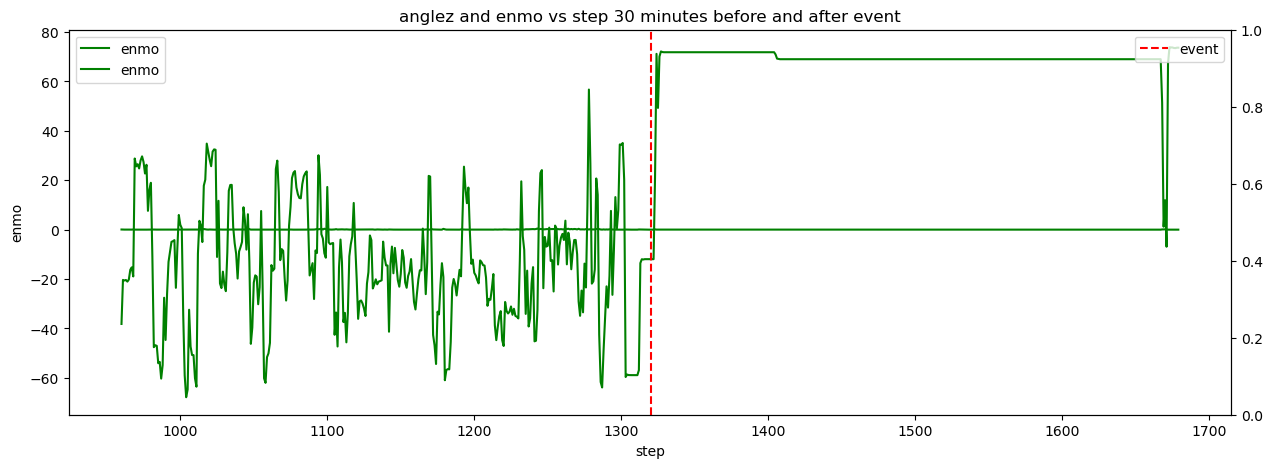

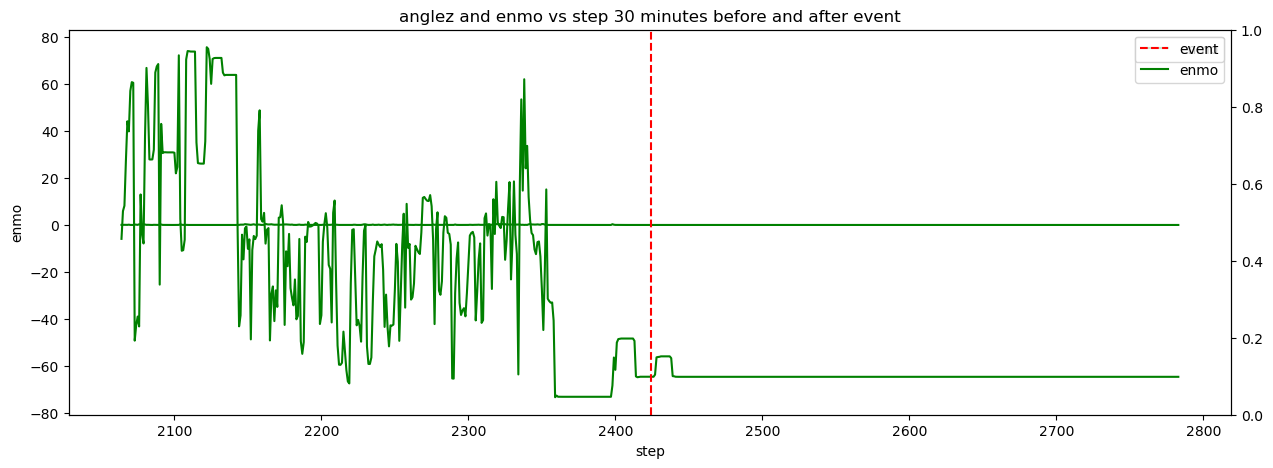

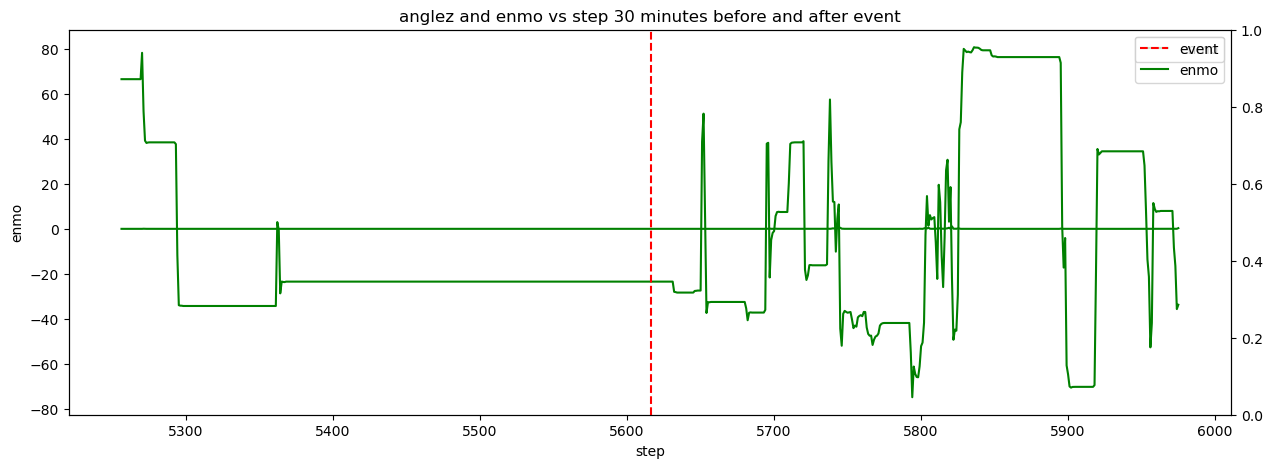

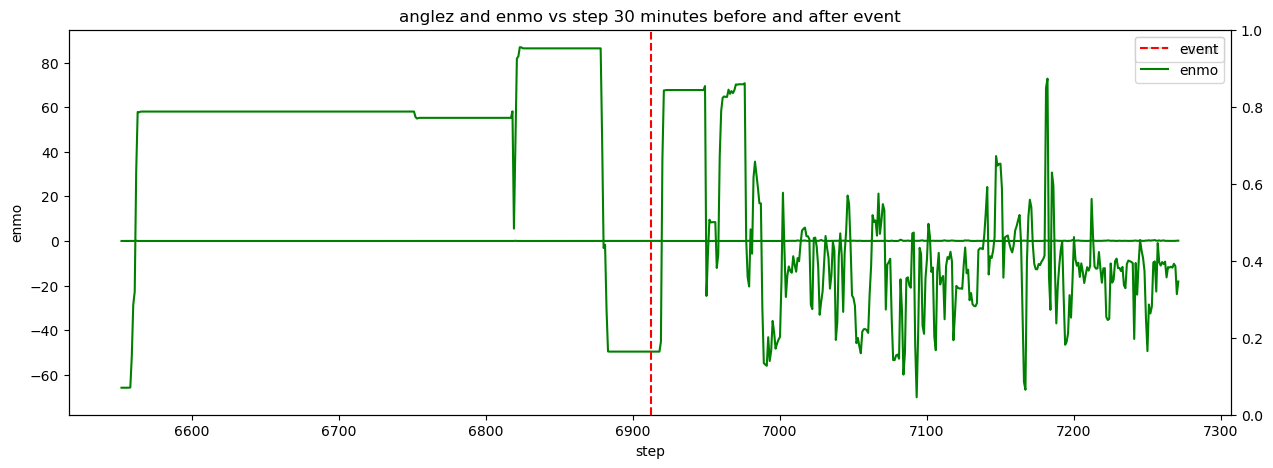

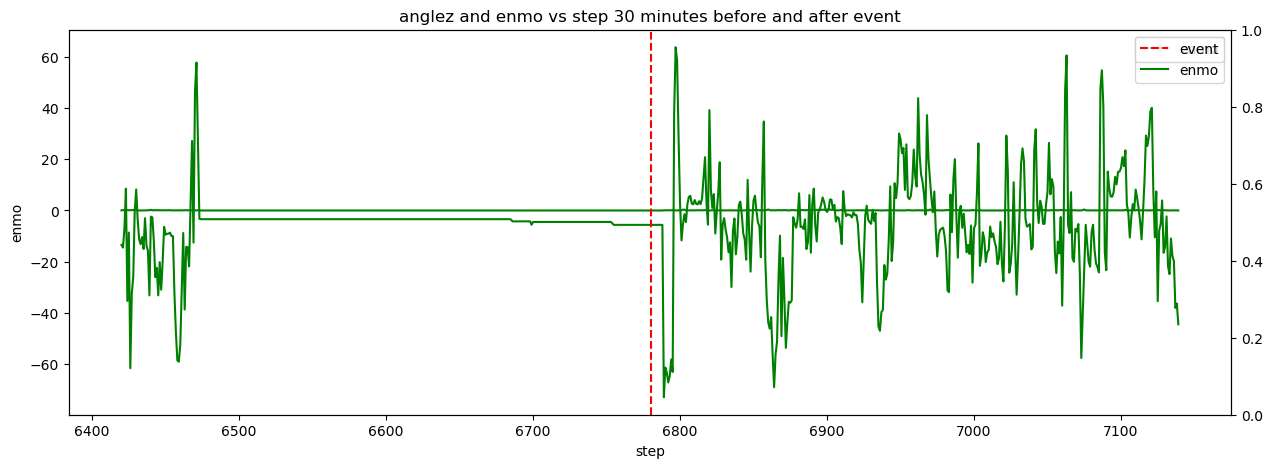

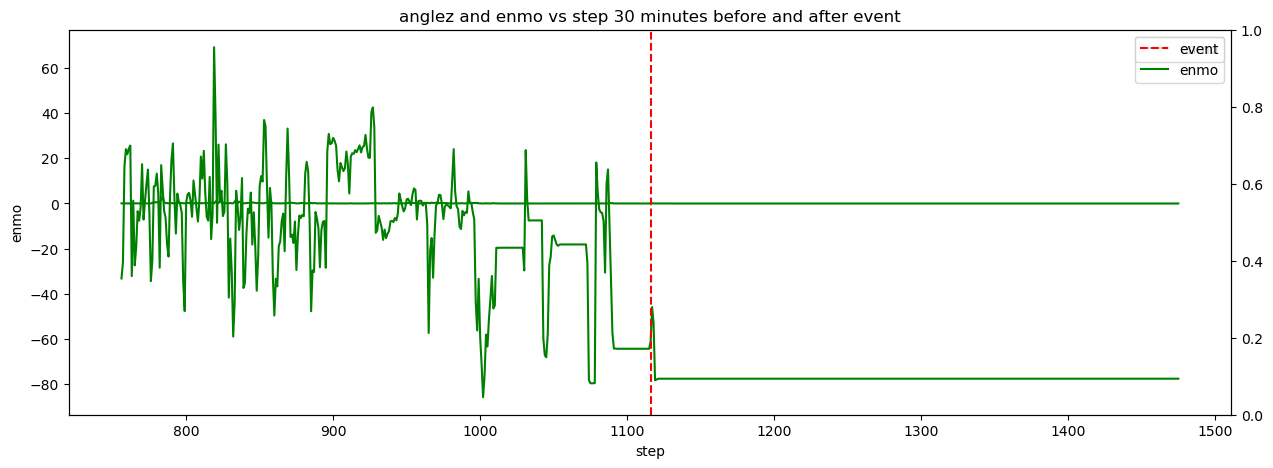

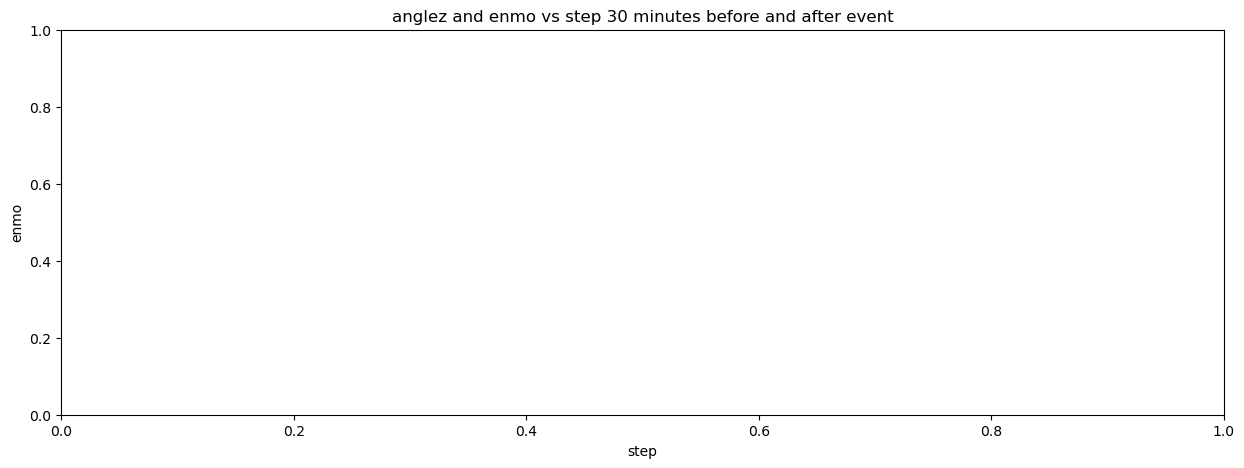

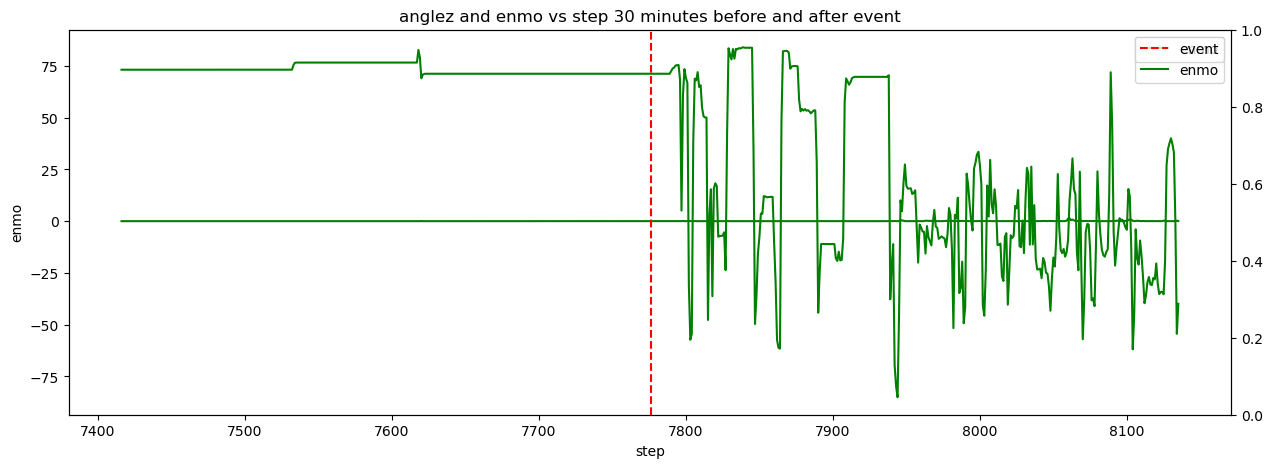

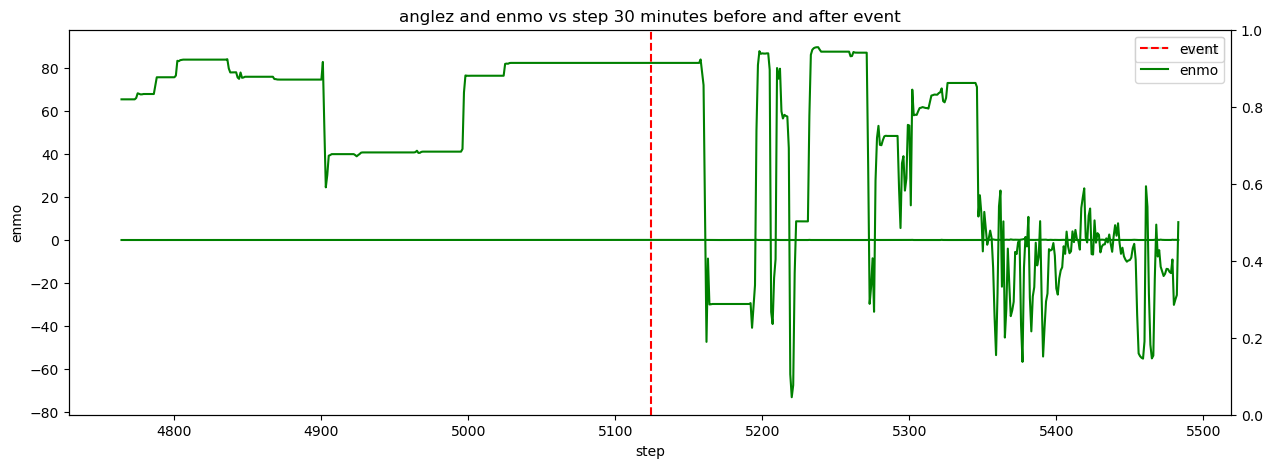

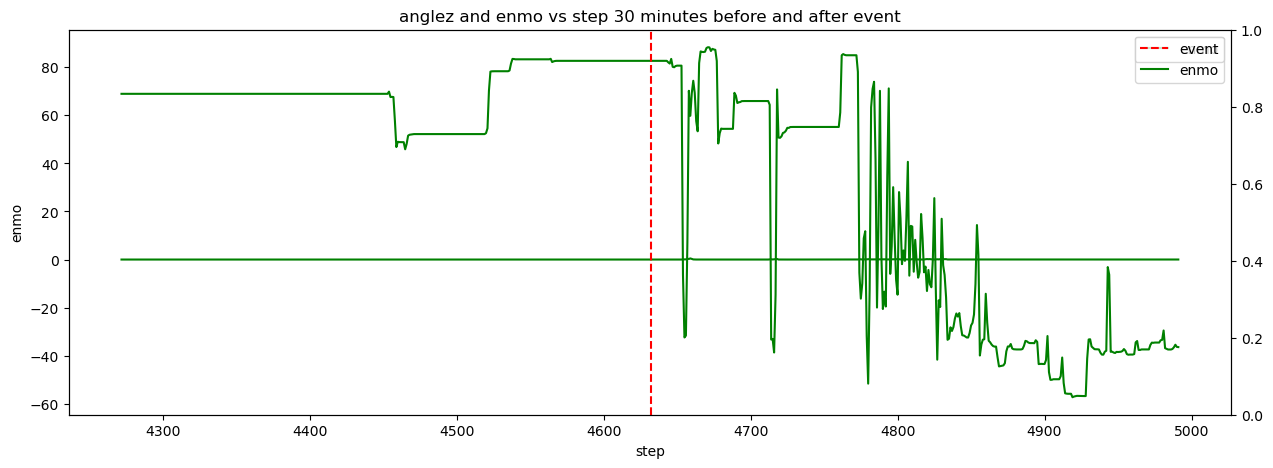

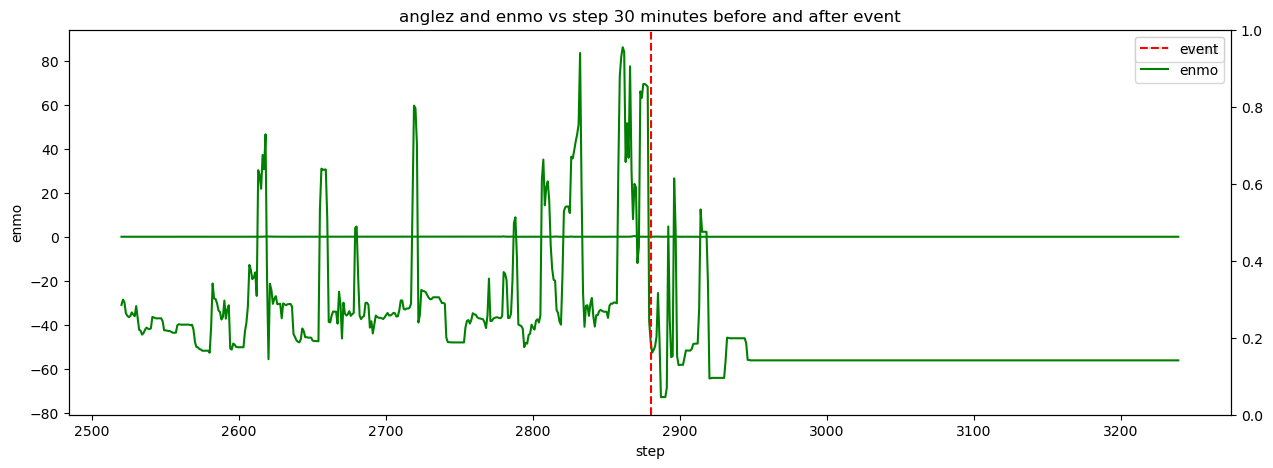

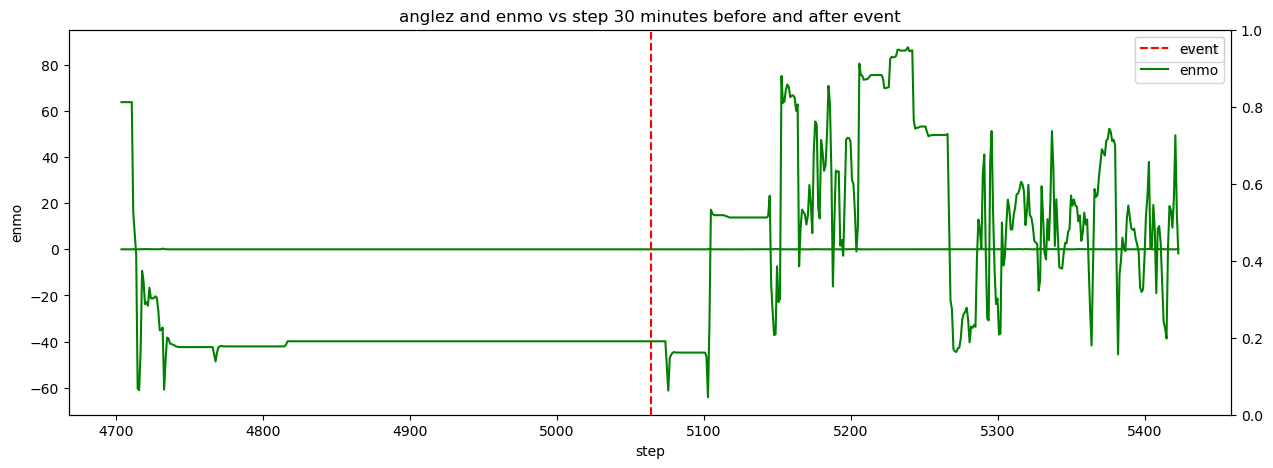

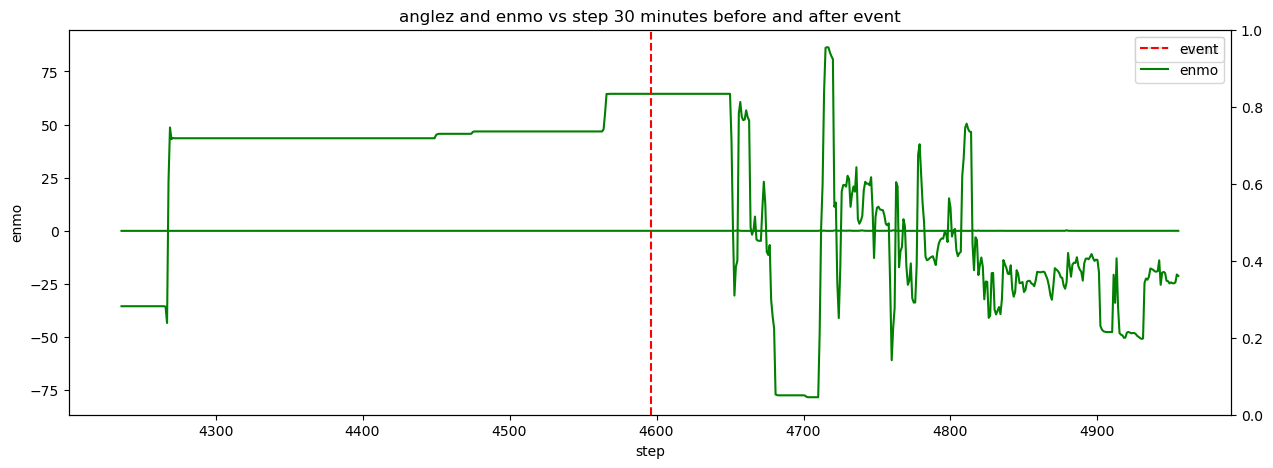

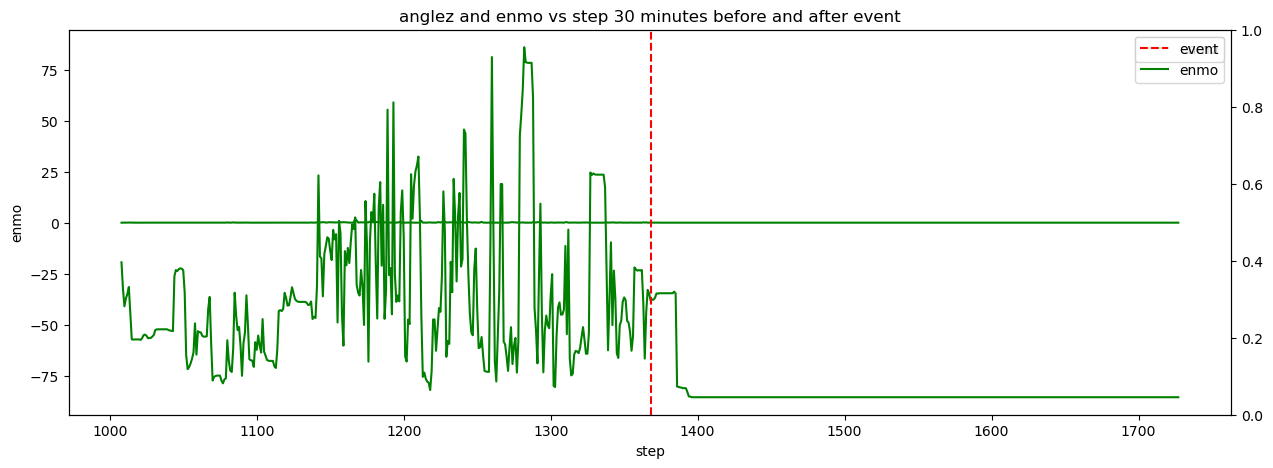

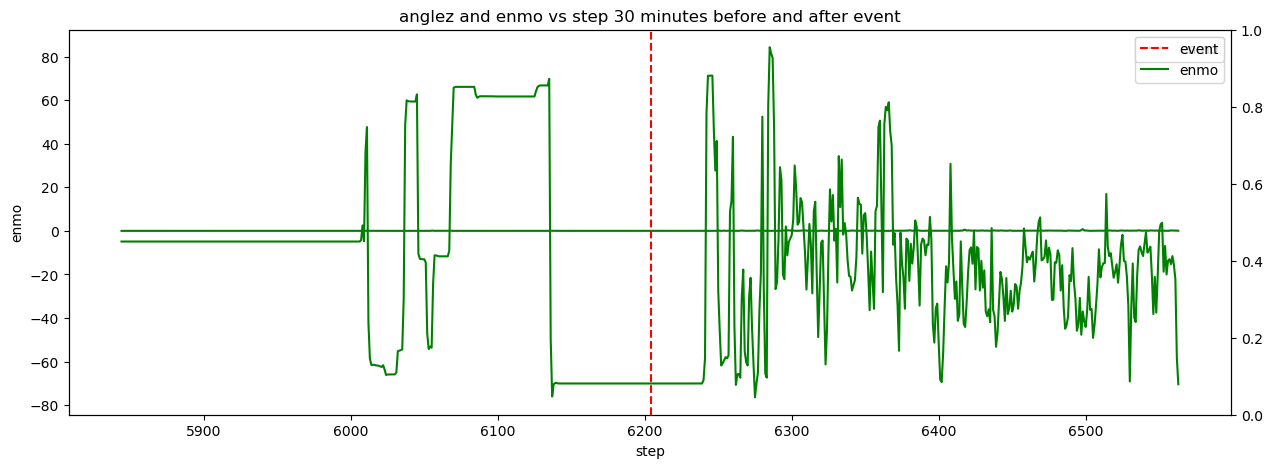

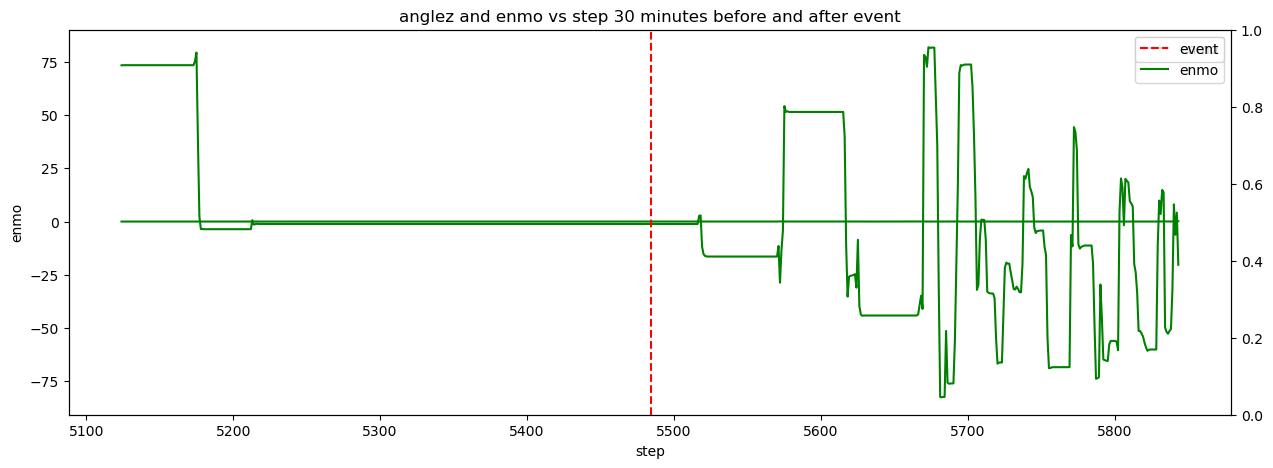

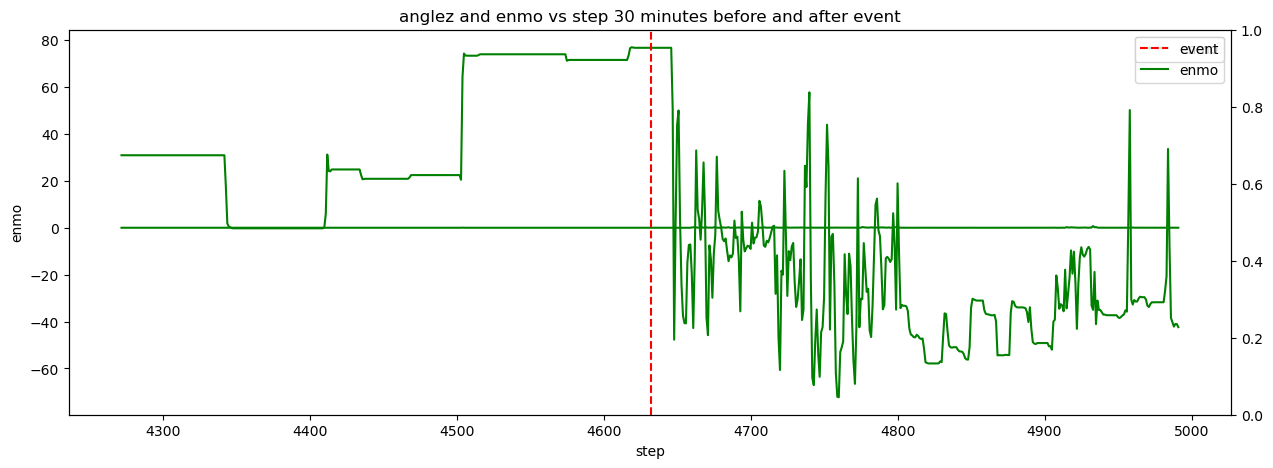

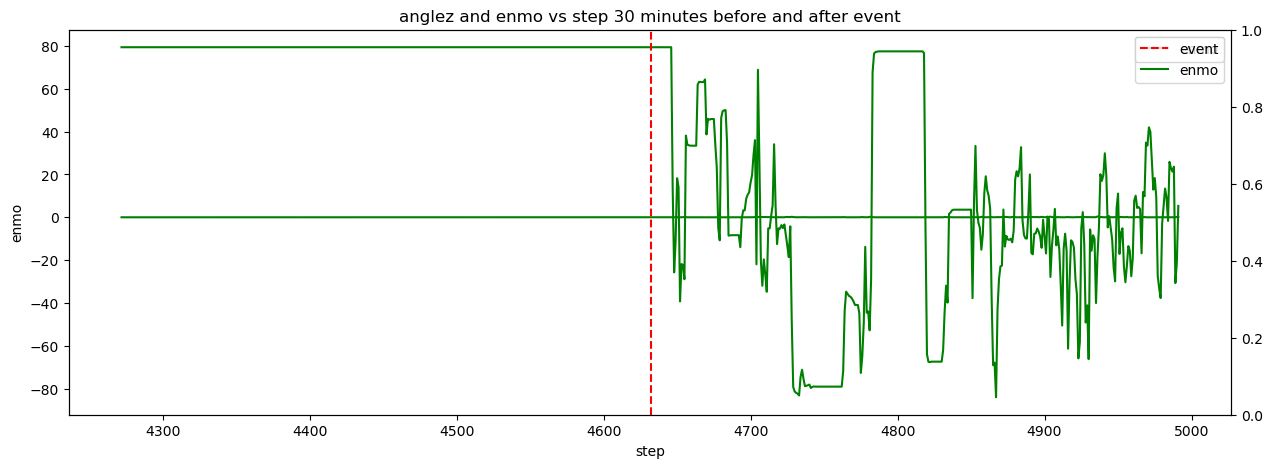

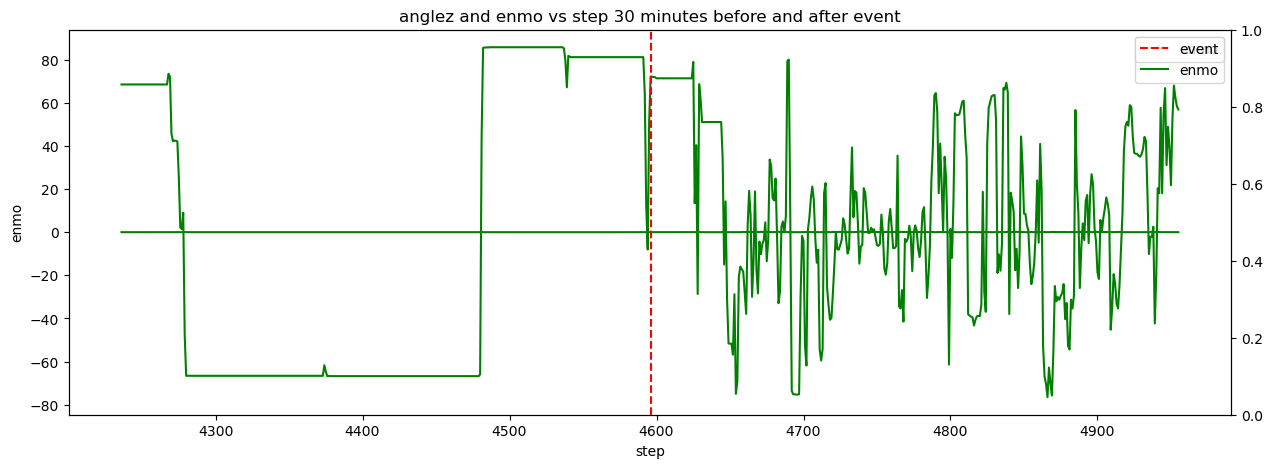

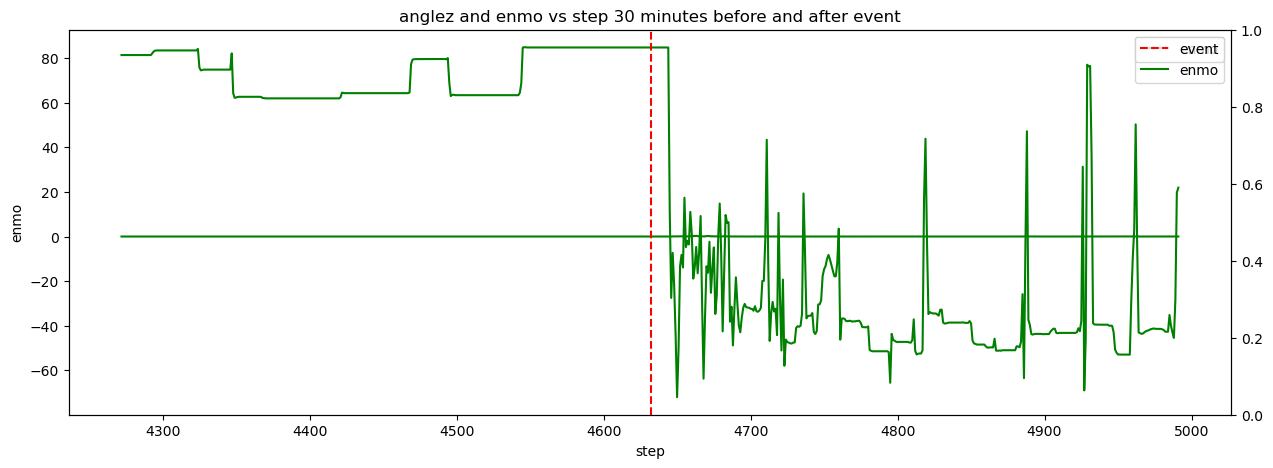

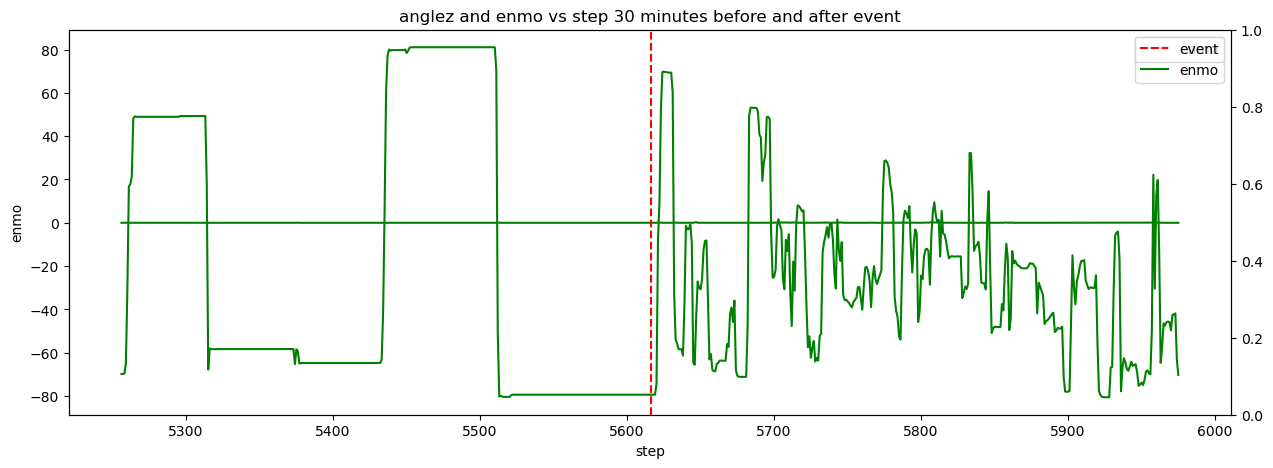

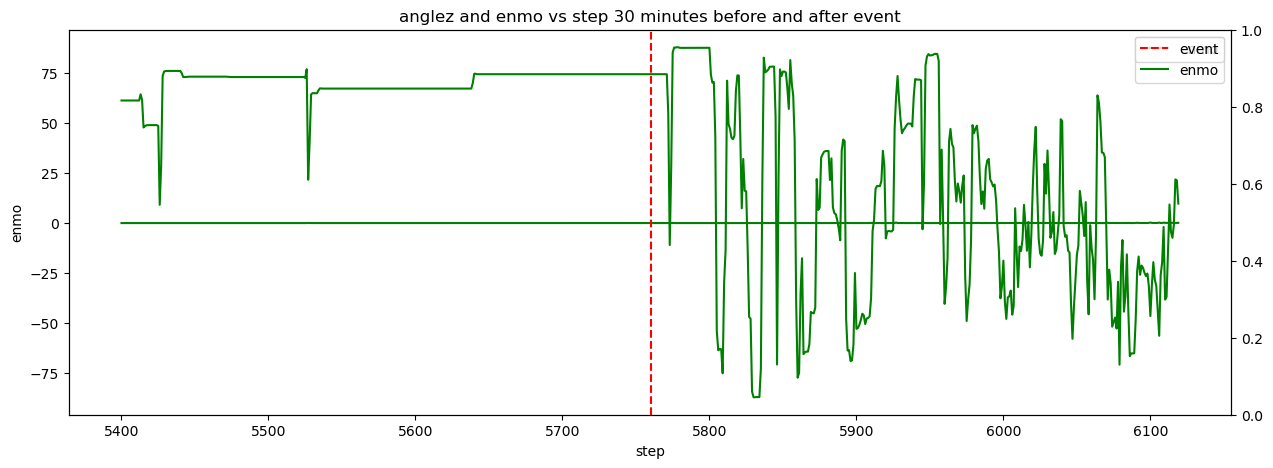

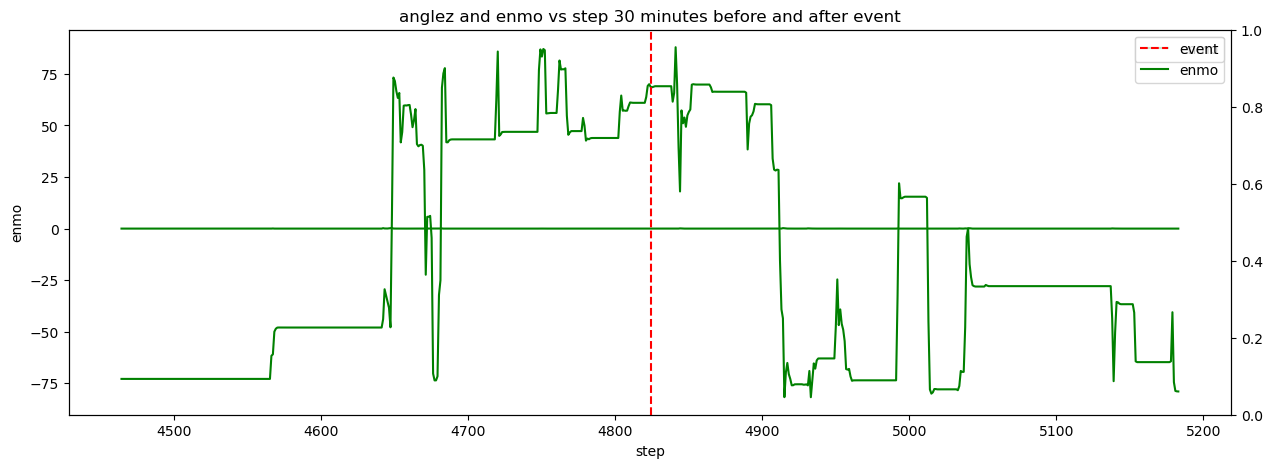

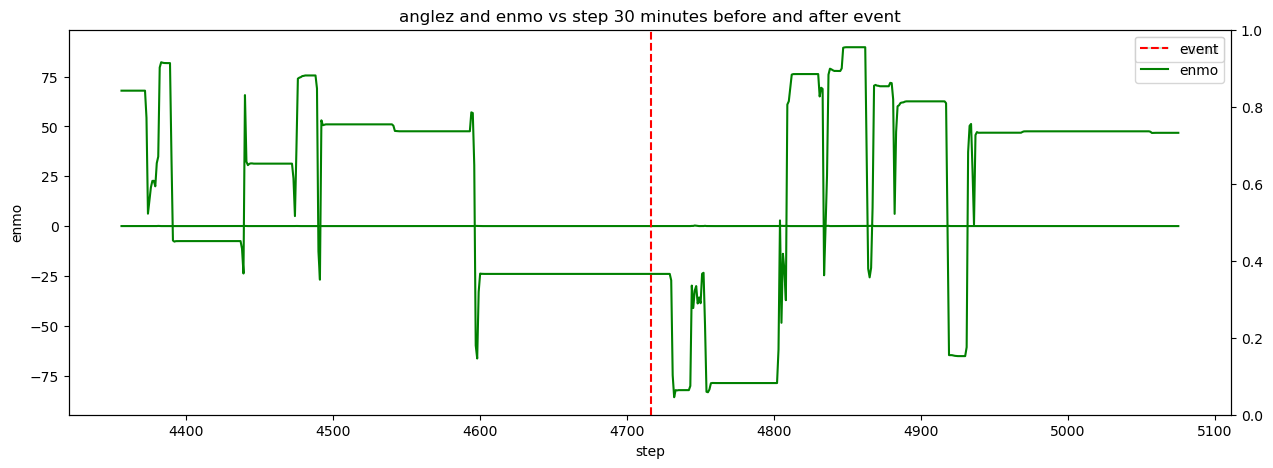

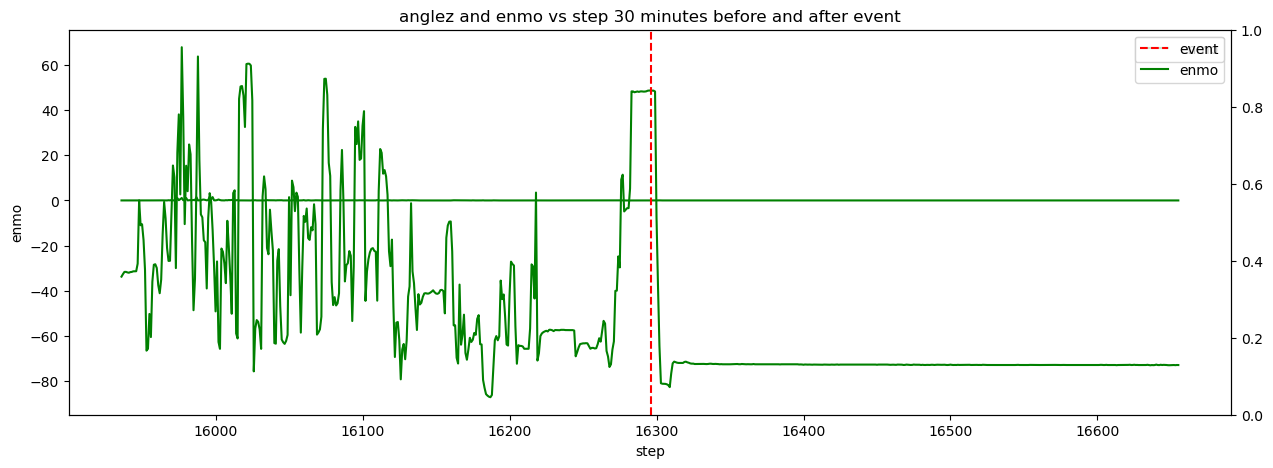

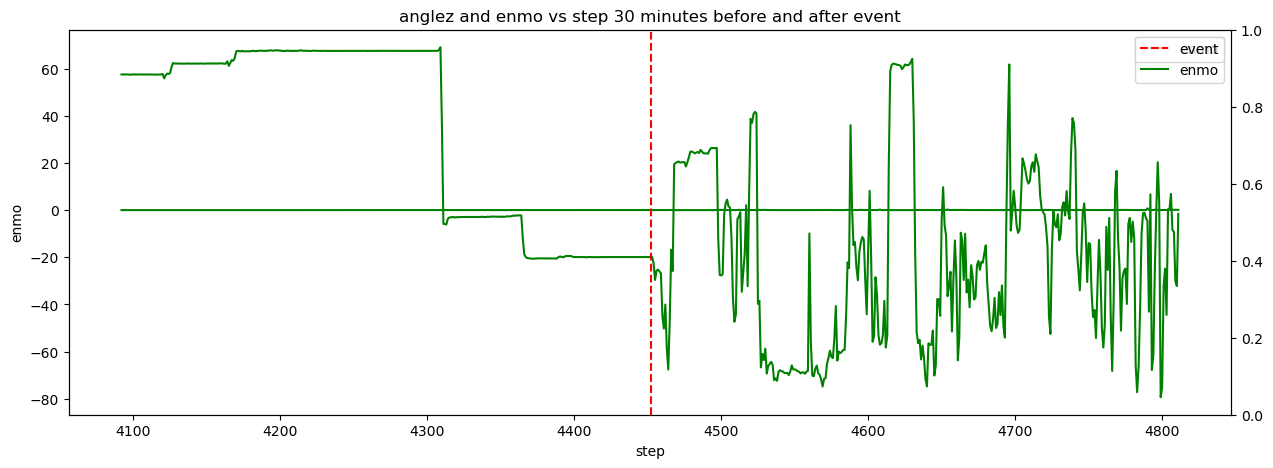

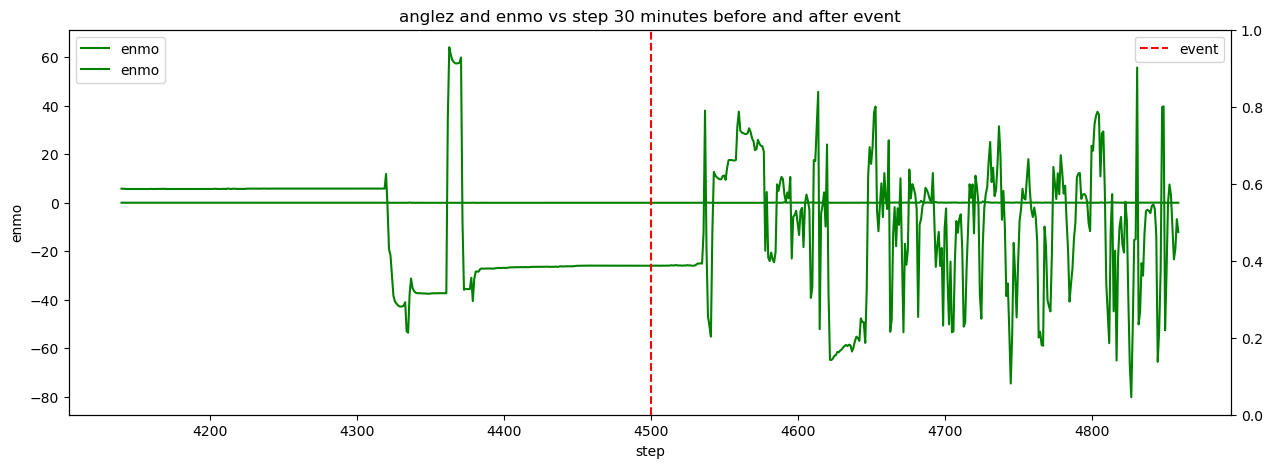

In [6]:
import pandas as pd

len_check = 100

count = 0
for i in range(len_check):
    event_truth = check_if_event_in_series(labels[i])
    count += event_truth

    if event_truth == 1:
        graph_enmo_from_torch(features[i], labels[i])

print()
print(count / len_check * 100, "% of series have an event")